<b><h1>AI GENIUSES - FIND IT DATA ANALYTICS COMPETITION</h1></b>

---

<b>Ketua Tim:</b>

*   Jemmy Febryan / Universitas Brawijaya / 215090400111018

<b>Anggota Tim:</b>
*   German Mindo Simamarta / Universitas Brawijaya / 215090400111015
*   Meirida Karisma Putri / Universitas Brawijaya / 215090400111056





---



# **1. Data Preparing**

Bagian ini menyiapkan dataset yang diperlukan

---



In [ ]:
import numpy as np
import pandas as pd

In [ ]:

df_train = pd.read_csv('train_features.csv')
df_train.head()

tahun_kelahiran pendidikan status_pernikahan   pendapatan  \
0             1979    Sarjana   Rencana Menikah          NaN   
1             1950    Sarjana   Rencana Menikah   84063000.0   
2             1966    Sarjana           Menikah  127532564.0   
3             1961   Magister   Rencana Menikah  165579620.0   
4             1970    Sarjana   Rencana Menikah  117703159.0   

   jumlah_anak_balita  jumlah_anak_remaja  terakhir_belanja  belanja_buah  \
0                 0.0                 1.0               NaN       50575.0   
1                 NaN                 NaN              70.0        6069.0   
2                 0.0                 0.0              45.0      117611.0   
3                 0.0                 0.0              90.0      206346.0   
4                 1.0                 1.0              78.0       90563.0   

   belanja_daging  belanja_ikan  belanja_kue  pembelian_diskon  pembelian_web  \
0        260967.0       50575.0      20230.0               2.0            2.0   
1         44506.0       80920.0      20230.0               9.0            6.0   
2        265460.0       96341.0     145573.0               1.0            1.0   
3       1613901.0       27725.0     125868.0               0.0            7.0   
4        311757.0       40358.0      33875.0               7.0            6.0   

   pembelian_toko  keluhan tanggal_menjadi_anggota  
0             5.0      0.0              2014-05-05  
1             4.0      0.0              2013-03-17  
2             7.0      0.0                     NaN  
3             8.0      0.0                     NaN  
4             5.0      0.0                     NaN

In [ ]:
df_test = pd.read_csv('test_features.csv')
df_test.head()

ID  tahun_kelahiran pendidikan status_pernikahan   pendapatan  \
0  2241             1957    Sarjana               NaN  120660151.0   
1  2274             1968     Doktor           Menikah  163551821.0   
2  1107             1968        SMA           Menikah   29857000.0   
3  4478             1971     Doktor           Menikah  117949098.0   
4  5080             1974    Sarjana   Rencana Menikah  164761134.0   

   jumlah_anak_balita  jumlah_anak_remaja  terakhir_belanja  belanja_buah  \
0                 0.0                 1.0              63.0      122277.0   
1                 0.0                 1.0              58.0       35761.0   
2                 0.0                 0.0              34.0        8092.0   
3                 0.0                 1.0              82.0        4872.0   
4                 0.0                 0.0              28.0      343208.0   

   belanja_daging  belanja_ikan  belanja_kue  pembelian_diskon  pembelian_web  \
0        541399.0      214192.0      84305.0               4.0            6.0   
1        353335.0       63365.0      41112.0               2.0            5.0   
2         22253.0       30345.0      26299.0               2.0            0.0   
3        126061.0           0.0       9745.0               3.0            5.0   
4       1416462.0      236196.0     107776.0               0.0            1.0   

   pembelian_toko  keluhan tanggal_menjadi_anggota  
0            10.0      0.0                     NaN  
1            10.0      0.0                     NaN  
2             5.0      0.0              2013-08-06  
3             7.0      0.0                     NaN  
4             8.0      0.0                     NaN

In [ ]:
df_label = pd.read_csv('train_labels.csv')
df_label.head()

jumlah_promosi
0               2
1               0
2               1
3               4
4               4

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_merge = pd.concat([df_train, df_test.drop(columns='ID')], axis=0).reset_index(drop=True)

df_merge['tahun_kelahiran'] = 2024 - df_merge['tahun_kelahiran']
df_merge.rename(columns={'tahun_kelahiran': 'umur'}, inplace=True)
# Replace '5' with mode for each column
for col in ['pendidikan', 'status_pernikahan']:
    df_merge[col] = df_merge[col].replace('5', df_merge[col].mode()[0])

# Use LabelEncoder for categorical columns
encoder = LabelEncoder()
for col in ['pendidikan', 'status_pernikahan']:
    df_merge[col] = encoder.fit_transform(df_merge[col])

In [ ]:
tanggal_missing_value = df_merge['tanggal_menjadi_anggota'].isnull().sum()
percentage = tanggal_missing_value/len(df_merge)*100
print(percentage)

72.18074656188605


In [ ]:
# Convert 'date' column to datetime
df_merge['tanggal_menjadi_anggota'] = pd.to_datetime(df_merge['tanggal_menjadi_anggota'])

# Extract year, month, and day
df_merge['year'] = df_merge['tanggal_menjadi_anggota'].dt.year
df_merge['month'] = df_merge['tanggal_menjadi_anggota'].dt.month
df_merge['day'] = df_merge['tanggal_menjadi_anggota'].dt.day

df_merge.drop('tanggal_menjadi_anggota', axis=1, inplace=True)

In [ ]:
df_merge.describe()

umur   pendidikan  status_pernikahan    pendapatan  \
count  7635.000000  7635.000000        7635.000000  7.242000e+03   
mean     56.193058     2.735953           2.872561  1.154025e+08   
std      11.787612     1.600763           1.133307  4.740740e+07   
min      15.000000     0.000000           0.000000  2.998899e+06   
25%      48.000000     1.000000           2.000000  8.143076e+07   
50%      56.000000     4.000000           3.000000  1.171642e+08   
75%      65.000000     4.000000           4.000000  1.505645e+08   
max     132.000000     5.000000           5.000000  1.305740e+09   

       jumlah_anak_balita  jumlah_anak_remaja  terakhir_belanja  \
count         7236.000000         7221.000000       7262.000000   
mean             0.288004            0.354522         47.206555   
std              0.469056            0.494908         27.002875   
min              0.000000            0.000000          0.000000   
25%              0.000000            0.000000         25.000000   
50%              0.000000            0.000000         47.000000   
75%              1.000000            1.000000         69.000000   
max              2.000000            2.000000        133.000000   

        belanja_buah  belanja_daging   belanja_ikan    belanja_kue  \
count    7268.000000    7.262000e+03    7246.000000    7234.000000   
mean    60518.768162    4.456959e+05   83383.265388   63590.557921   
std     75345.181046    5.121959e+05  101911.919007   78926.484973   
min         0.000000    0.000000e+00       0.000000       0.000000   
25%      7708.000000    5.182575e+04   10115.000000    8092.000000   
50%     28295.000000    2.282075e+05   37394.000000   28399.000000   
75%     86485.500000    7.032650e+05  127247.250000   90802.000000   
max    408646.000000    3.489675e+06  621600.000000  542164.000000   

       pembelian_diskon  pembelian_web  pembelian_toko      keluhan  \
count       7278.000000    7290.000000     7280.000000  7246.000000   
mean           2.113630       4.450754        5.801648     0.003864   
std            2.107755       2.969152        3.249644     0.062047   
min            0.000000       0.000000        0.000000     0.000000   
25%            0.000000       2.000000        3.000000     0.000000   
50%            2.000000       4.000000        5.000000     0.000000   
75%            3.000000       6.000000        8.000000     0.000000   
max           20.000000      30.000000       17.000000     1.000000   

              year        month          day  
count  2124.000000  2124.000000  2124.000000  
mean   2013.029661     6.445857    15.674200  
std       0.686019     3.485707     8.789434  
min    2012.000000     1.000000     1.000000  
25%    2013.000000     3.000000     8.000000  
50%    2013.000000     6.000000    15.500000  
75%    2014.000000    10.000000    23.000000  
max    2014.000000    12.000000    31.000000

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7635 entries, 0 to 7634
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   umur                7635 non-null   int64  
 1   pendidikan          7635 non-null   int64  
 2   status_pernikahan   7635 non-null   int64  
 3   pendapatan          7242 non-null   float64
 4   jumlah_anak_balita  7236 non-null   float64
 5   jumlah_anak_remaja  7221 non-null   float64
 6   terakhir_belanja    7262 non-null   float64
 7   belanja_buah        7268 non-null   float64
 8   belanja_daging      7262 non-null   float64
 9   belanja_ikan        7246 non-null   float64
 10  belanja_kue         7234 non-null   float64
 11  pembelian_diskon    7278 non-null   float64
 12  pembelian_web       7290 non-null   float64
 13  pembelian_toko      7280 non-null   float64
 14  keluhan             7246 non-null   float64
 15  year                2124 non-null   float64
 16  month 

# **2. Exploratory Data Analysis (EDA)**

Dataset yang sudah siap kemudian dilakukan ekpslorasi. Bagian ini mengetahui karakteristik data untuk keperluan analisis

## a. Simple Fill Null

<ipython-input-18-5c861af6a7fa>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values_count.index, y=missing_values_count.values, palette=colors)


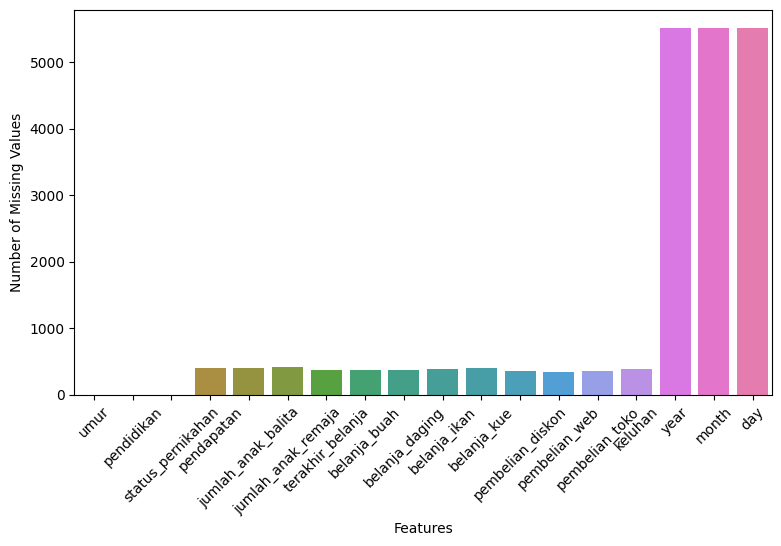

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming df_train_cleaning is your DataFrame
features = df_merge.columns # List of features to include
colors = sns.color_palette('husl', len(features))

missing_values_count = df_merge[features].isnull().sum()
plt.figure(figsize=(9, 5))
sns.barplot(x=missing_values_count.index, y=missing_values_count.values, palette=colors)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
# plt.title('Distribution of Missing Values Across Features')
plt.show()

In [ ]:
df_merge_EDA = df_merge.copy()
numeric_cols = ['umur', 'pendapatan', 'jumlah_anak_balita', 'jumlah_anak_remaja',
                'terakhir_belanja', 'belanja_buah', 'belanja_daging', 'belanja_ikan',
                'belanja_kue', 'pembelian_diskon', 'pembelian_web', 'pembelian_toko',
                'keluhan', 'year', 'month', 'day']

categorical_cols = ['pendidikan', 'status_pernikahan']

for col in numeric_cols:
    df_merge_EDA[col] = df_merge_EDA[col].fillna(df_merge_EDA[col].mean())

for col in categorical_cols:
    df_merge_EDA[col] = df_merge_EDA[col].fillna(df_merge_EDA[col].mode()[0])

df_merge_EDA.head()

umur  pendidikan  status_pernikahan    pendapatan  jumlah_anak_balita  \
0    45           4                  3  1.154025e+08            0.000000   
1    74           4                  3  8.406300e+07            0.288004   
2    58           4                  2  1.275326e+08            0.000000   
3    63           1                  3  1.655796e+08            0.000000   
4    54           4                  3  1.177032e+08            1.000000   

   jumlah_anak_remaja  terakhir_belanja  belanja_buah  belanja_daging  \
0            1.000000         47.206555       50575.0        260967.0   
1            0.354522         70.000000        6069.0         44506.0   
2            0.000000         45.000000      117611.0        265460.0   
3            0.000000         90.000000      206346.0       1613901.0   
4            1.000000         78.000000       90563.0        311757.0   

   belanja_ikan  belanja_kue  pembelian_diskon  pembelian_web  pembelian_toko  \
0       50575.0      20230.0               2.0            2.0             5.0   
1       80920.0      20230.0               9.0            6.0             4.0   
2       96341.0     145573.0               1.0            1.0             7.0   
3       27725.0     125868.0               0.0            7.0             8.0   
4       40358.0      33875.0               7.0            6.0             5.0   

   keluhan         year     month      day  
0      0.0  2014.000000  5.000000   5.0000  
1      0.0  2013.000000  3.000000  17.0000  
2      0.0  2013.029661  6.445857  15.6742  
3      0.0  2013.029661  6.445857  15.6742  
4      0.0  2013.029661  6.445857  15.6742

## b. Plot Distribution

In [ ]:
df_merge_raw = pd.read_csv('df_merge_raw.csv')

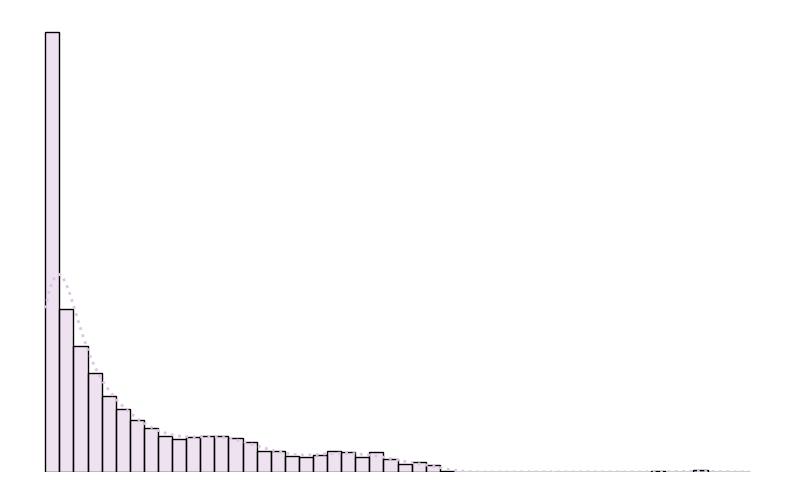

In [ ]:
# Assuming df_merge_EDA is your DataFrame

feature_name = 'belanja_daging'  # Change this to the feature you want to visualize

plt.figure(figsize=(10, 6))
sns.histplot(df_merge_raw[feature_name].dropna(), bins=50, kde=True, line_kws={'color': '#DEC5E3', 'lw': 2, 'ls': ':'}, color='#DEC5E3', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Density')
# Save the plot with transparent background
plt.axis('off')
plt.savefig('distribusi_belanja_daging_violet.png', transparent=True)
plt.show()

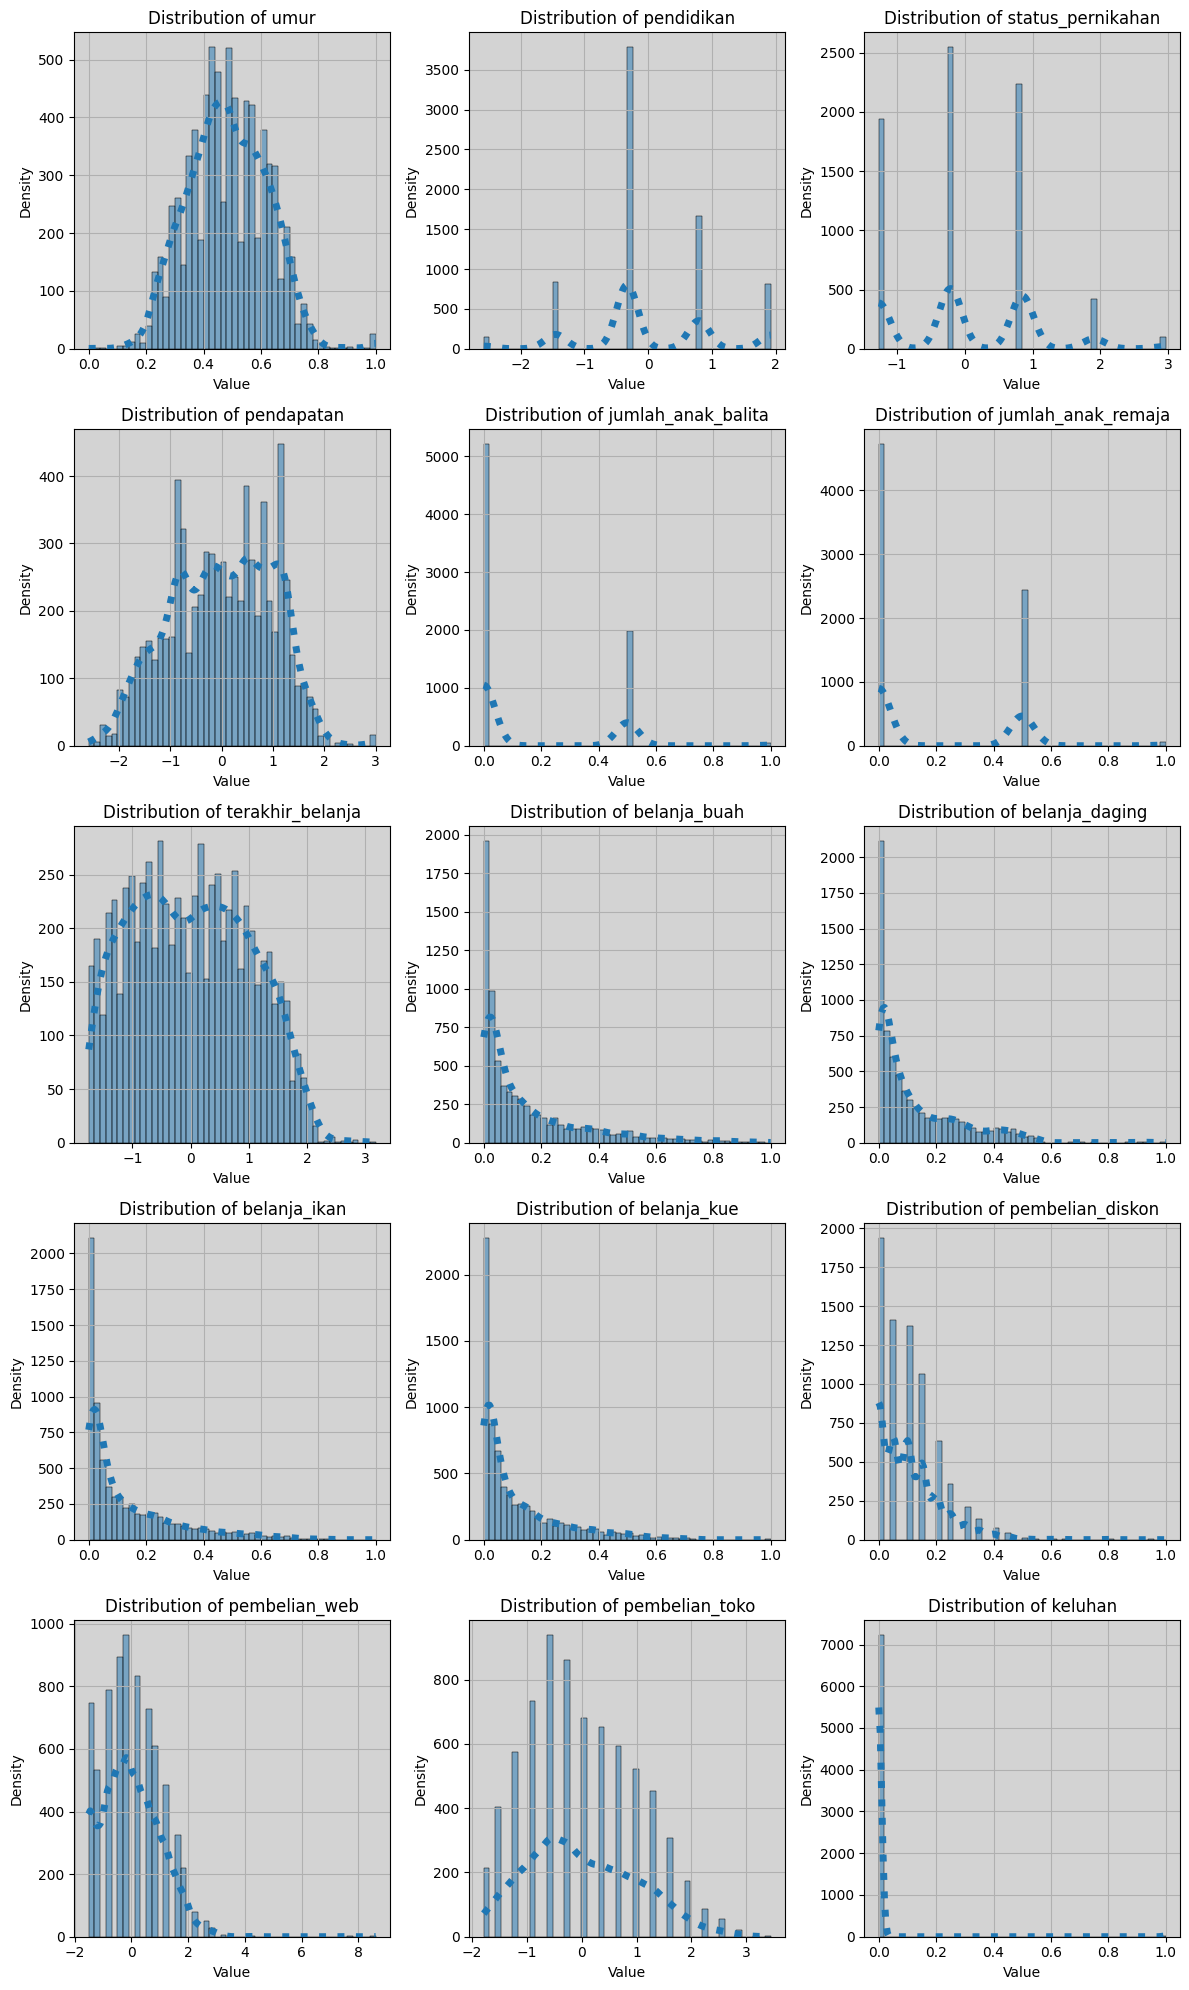

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Assuming df_merge_raw is your DataFrame
df_merge_raw = pd.read_csv('df_merge_raw.csv')

num_cols = len(df_merge_raw.columns)
num_rows = (num_cols + 2) // 3

# Create a custom colormap ranging from green to red
colors = [(0, 1, 0), (1, 0, 0)]  # Green to Red
cmap = LinearSegmentedColormap.from_list('green_to_red', colors, N=100)

fig, axs = plt.subplots(num_rows, 3, figsize=(12, num_rows*4))

for i in range(num_rows):
    for j in range(3):
        col_index = i * 3 + j
        if col_index < num_cols:
            temp_val = df_merge_raw[df_merge_raw.columns[col_index]].dropna().values
            sns.histplot(temp_val, bins=50, kde=True,
                         line_kws={'color': 'darkcyan', 'lw': 5, 'ls': ':'},
                         edgecolor='black', ax=axs[i, j])
            axs[i, j].set_title(f'Distribution of {df_merge_raw.columns[col_index]}')
            axs[i, j].set_xlabel('Value')
            axs[i, j].set_ylabel('Density')
            axs[i, j].grid(True)
            axs[i, j].set_facecolor('lightgray')  # Set background color

            # Set colormap for histogram bars based on value
            axs[i, j].set_prop_cycle('color', plt.cm.ScalarMappable(cmap=cmap).to_rgba(temp_val))

plt.tight_layout()
plt.show()


In [ ]:
df_merge_EDA.isnull().sum()

umur                  0
pendidikan            0
status_pernikahan     0
pendapatan            0
jumlah_anak_balita    0
jumlah_anak_remaja    0
terakhir_belanja      0
belanja_buah          0
belanja_daging        0
belanja_ikan          0
belanja_kue           0
pembelian_diskon      0
pembelian_web         0
pembelian_toko        0
keluhan               0
year                  0
month                 0
day                   0
dtype: int64

## c. Boxplot

In [ ]:
df_merge_raw = pd.read_csv('df_merge_raw.csv')

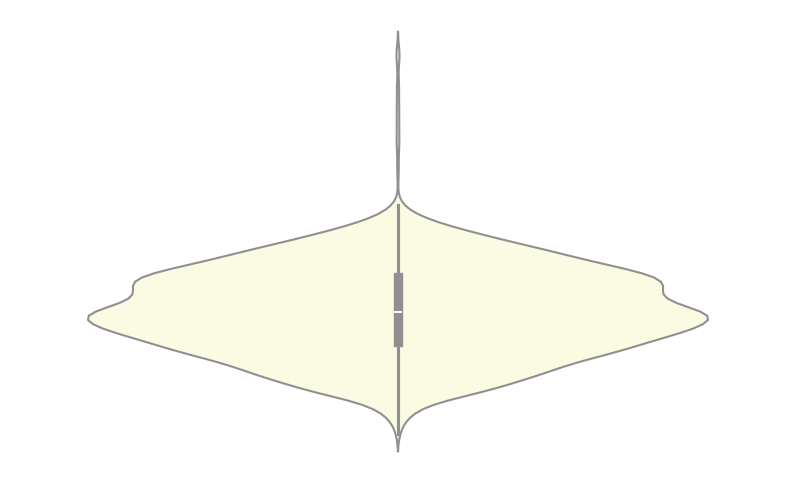

In [ ]:
# Assuming df_merge_EDA is your DataFrame

feature_name = 'umur'  # Change this to the feature you want to visualize

plt.figure(figsize=(10, 6))
sns.violinplot(df_train_cleaning[feature_name].dropna(), color='lightyellow',linewidth=1.5)
plt.xlabel('Value')
plt.ylabel('Density')
# Save the plot with transparent background
plt.axis('off')
plt.savefig('vioplot_umur.png', transparent=True)
plt.show()

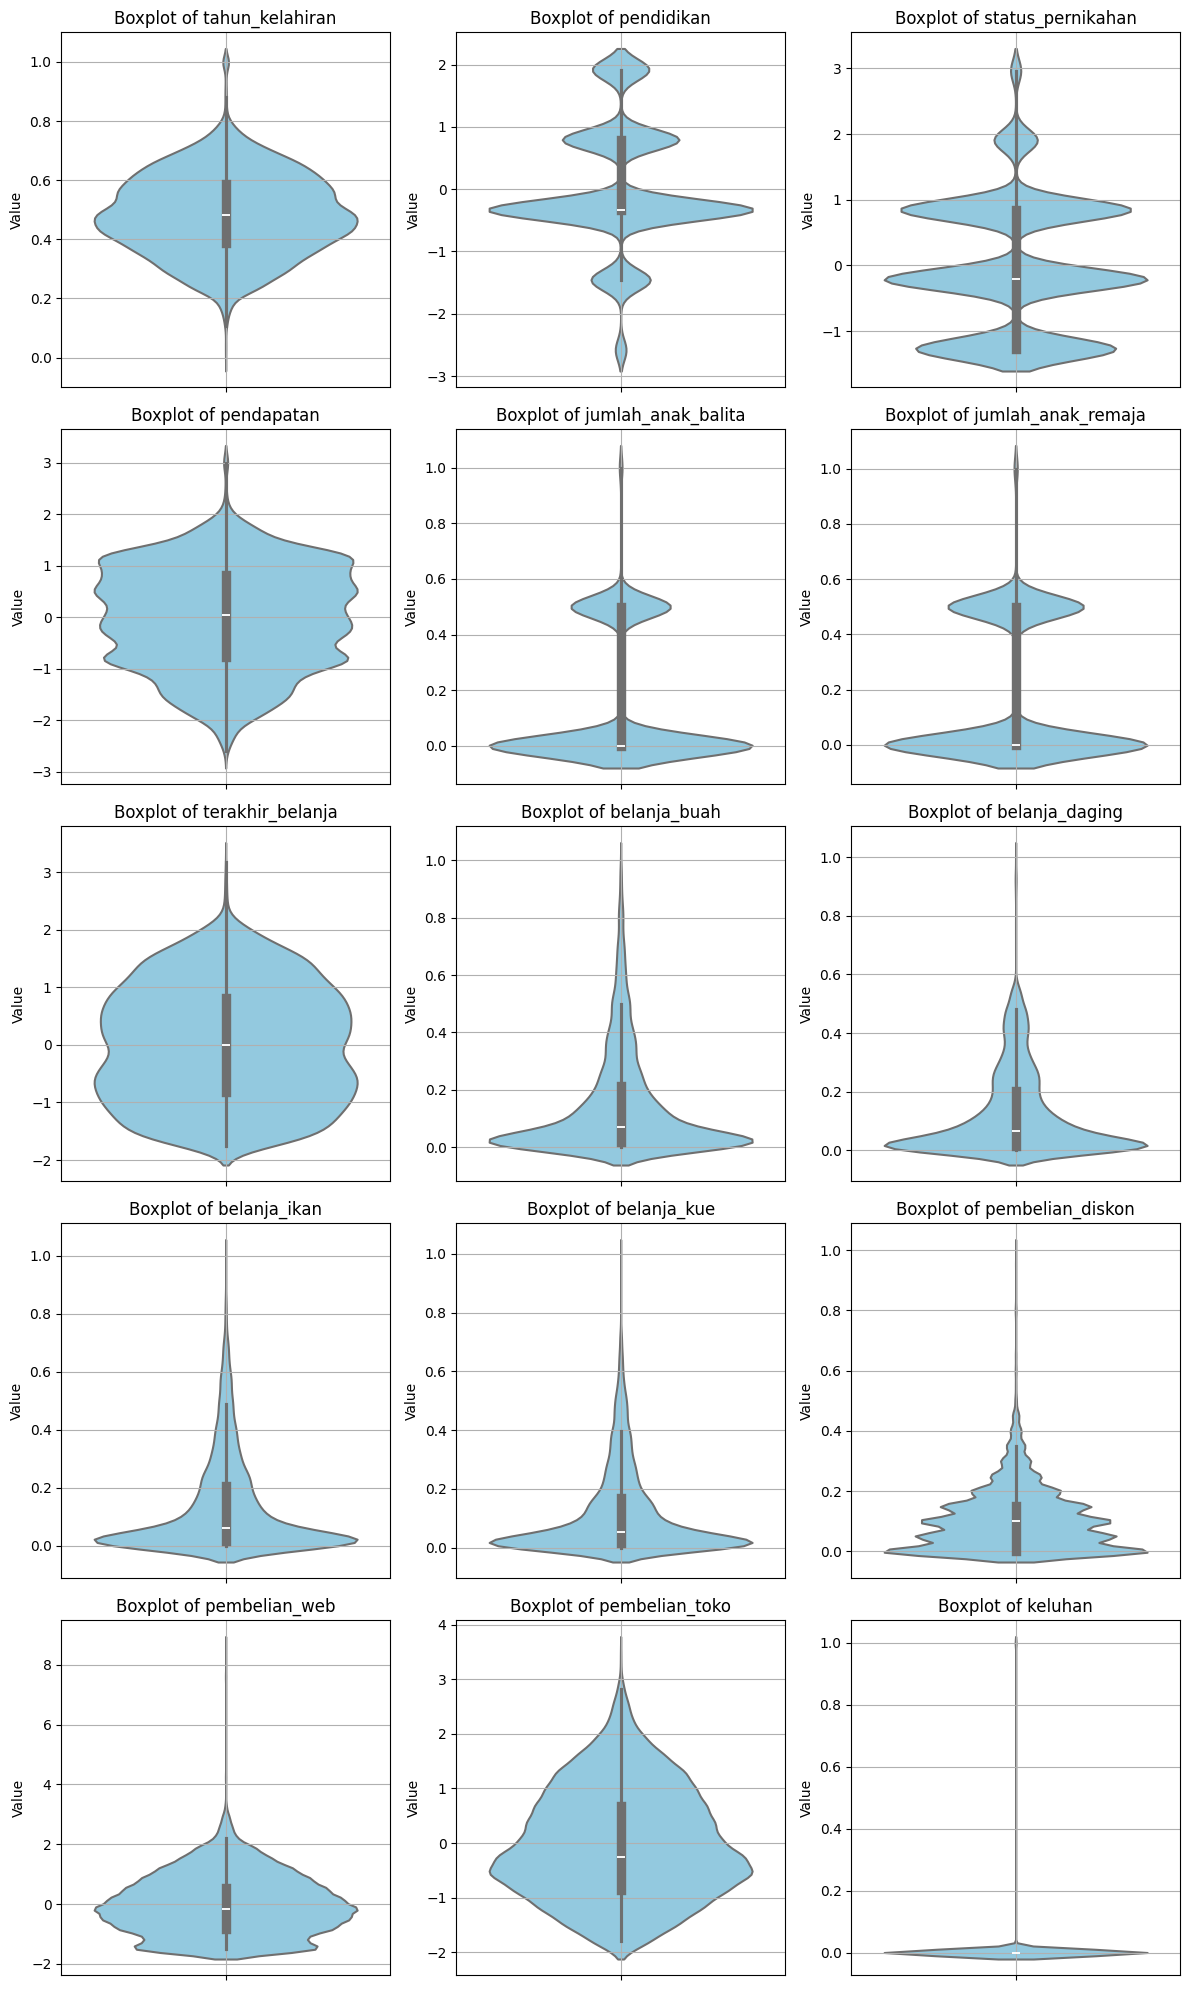

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_merge_raw_or = df_merge_raw.copy().rename(columns={'umur': 'tahun_kelahiran'})

# Assuming df_merge_raw_or is your DataFrame
num_cols = len(df_merge_raw_or.columns)
num_rows = (num_cols + 2) // 3  # Calculate number of rows needed for 3 visualizations per row

fig, axs = plt.subplots(num_rows, 3, figsize=(12, num_rows*4))  # Adjust figsize as needed

for i in range(num_rows):
    for j in range(3):  # Adjusted for 3 columns
        col_index = i * 3 + j
        if col_index < num_cols:
            temp_val = df_merge_raw_or[df_merge_raw_or.columns[col_index]].dropna().values
            sns.violinplot(y=temp_val, ax=axs[i, j], color='skyblue', linewidth=1.5)  # Use seaborn violinplot
            axs[i, j].set_title(f'Boxplot of {df_merge_raw_or.columns[col_index]}')
            axs[i, j].set_ylabel('Value')
            axs[i, j].grid(True)

# Remove empty subplots if any
for i in range(num_cols, num_rows * 3):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()


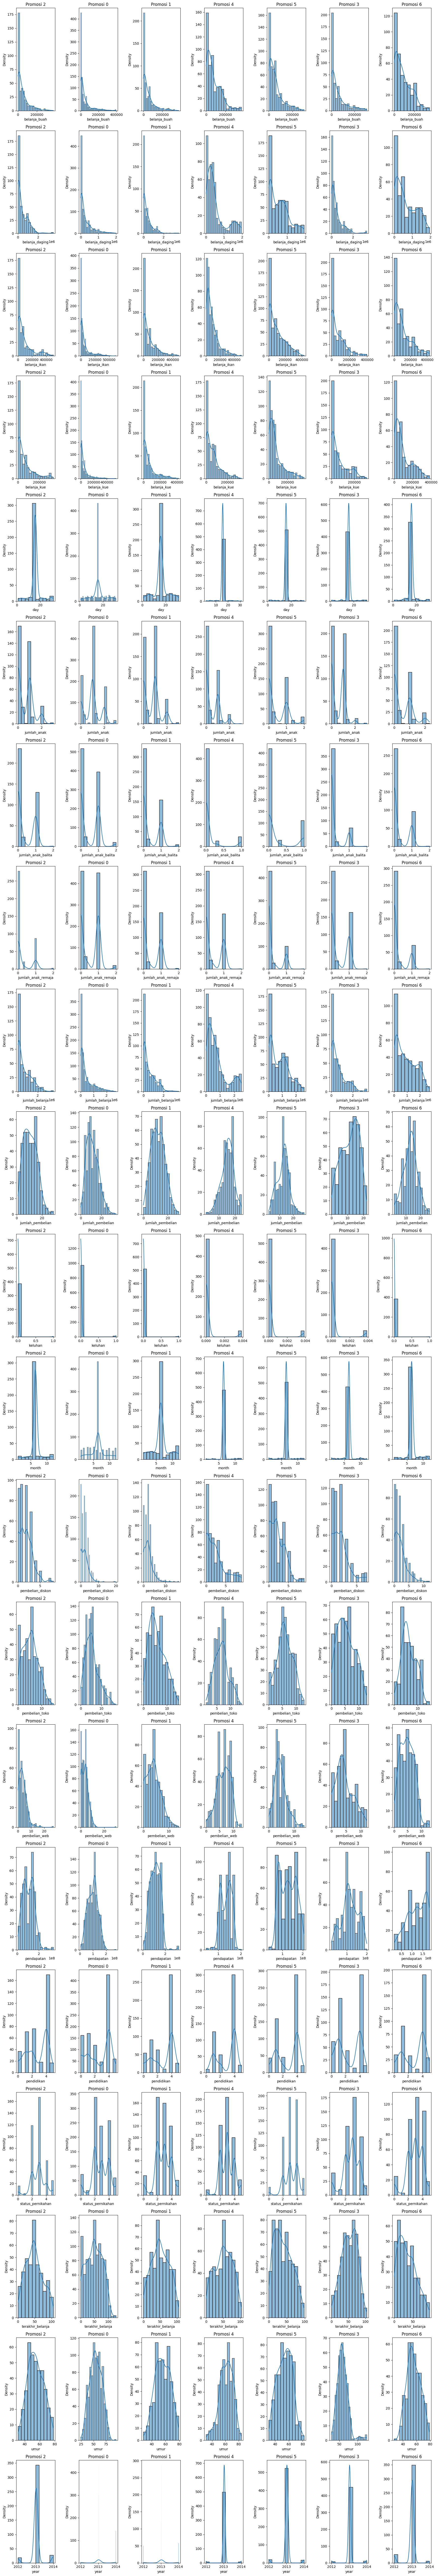

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_merge_raw is your DataFrame
promosi_values = df_train_cleaning['jumlah_promosi'].unique()
features = df_train_cleaning.columns.difference(['jumlah_promosi'])
num_subplots = len(promosi_values)

# Create a grid of subplots
fig, axs = plt.subplots(len(features), num_subplots, figsize=(18, 5 * len(features)))

# Handle the case of a single feature or a single promosi value
if len(features) == 1:
    axs = [axs]
if num_subplots == 1:
    axs = [[ax] for ax in axs]

for row, feature in enumerate(features):
    for col, promosi_value in enumerate(promosi_values):
        subset = df_train_cleaning[df_train_cleaning['jumlah_promosi'] == promosi_value]
        sns.histplot(subset[feature], ax=axs[row][col], kde=True)
        axs[row][col].set_title(f'Promosi {promosi_value}')
        axs[row][col].set_xlabel(feature)
        axs[row][col].set_ylabel('Density')

plt.tight_layout()
plt.show()

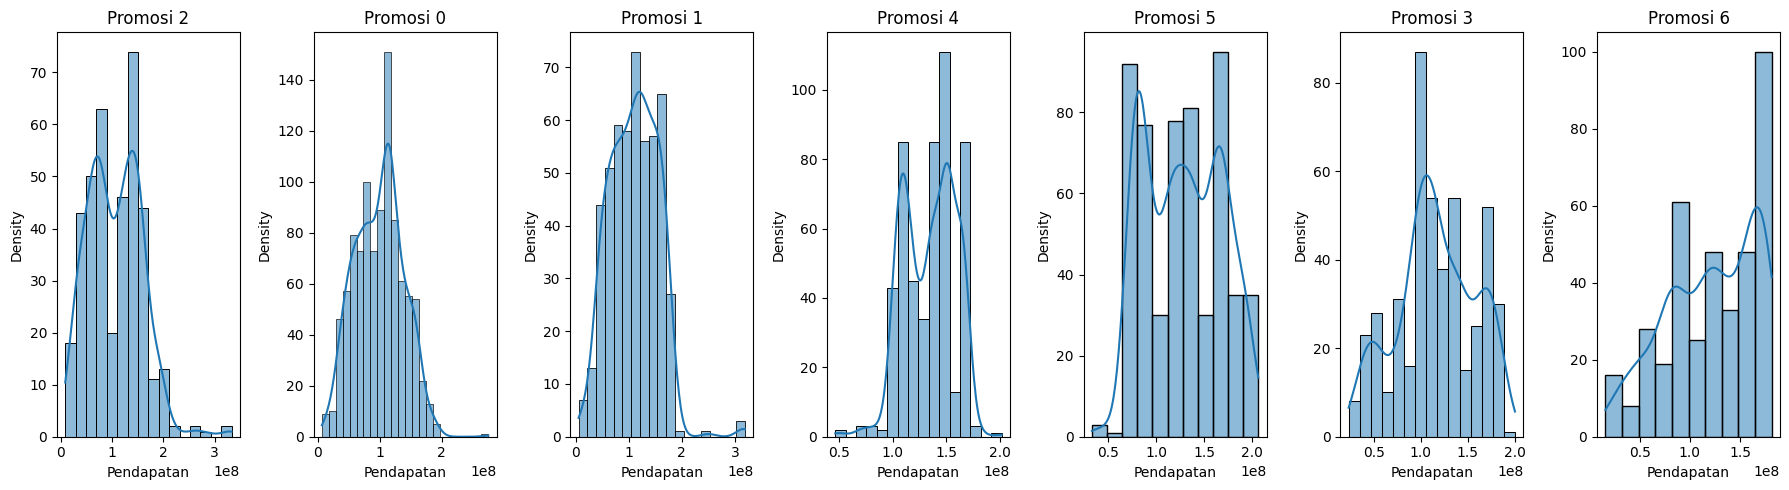

In [ ]:
# Assuming df_train_cleaning is your DataFrame
promosi_values = df_train_cleaning['jumlah_promosi'].unique()
num_subplots = len(promosi_values)

fig, axs = plt.subplots(1, num_subplots, figsize=(18, 5))

for i, promosi_value in enumerate(promosi_values):
    subset = df_train_cleaning[df_train_cleaning['jumlah_promosi'] == promosi_value]
    sns.histplot(subset['pendapatan'], ax=axs[i], kde=True)
    axs[i].set_title(f'Promosi {promosi_value}')
    axs[i].set_xlabel('Pendapatan')
    axs[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [ ]:
# Assuming df_train_cleaning is your DataFrame
target_classes_subset = [0, 1, 2, 3]  # List of target classes to include in the subset
target_classes_subset2 = [4, 5,6]
df_subset = df_train_cleaning[df_train_cleaning['jumlah_promosi'].isin(target_classes_subset)]
df_subset2 = df_train_cleaning[df_train_cleaning['jumlah_promosi'].isin(target_classes_subset2)]

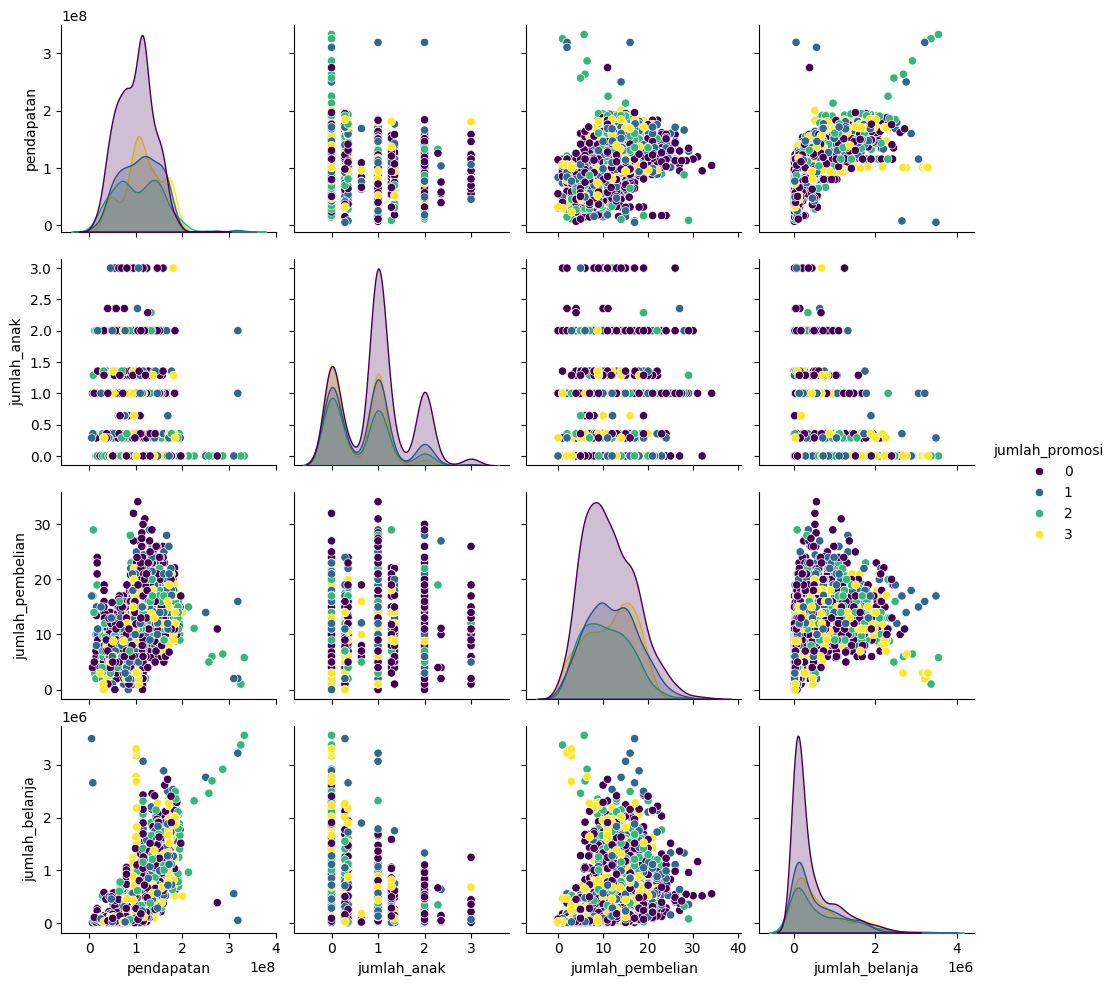

In [ ]:
# Assuming df_train_cleaning is your DataFrame
features = ['pendapatan', 'jumlah_anak', 'jumlah_pembelian', 'jumlah_belanja']  # List of features to visualize
sns.pairplot(df_subset, vars=features, hue='jumlah_promosi', palette='viridis')
plt.show()

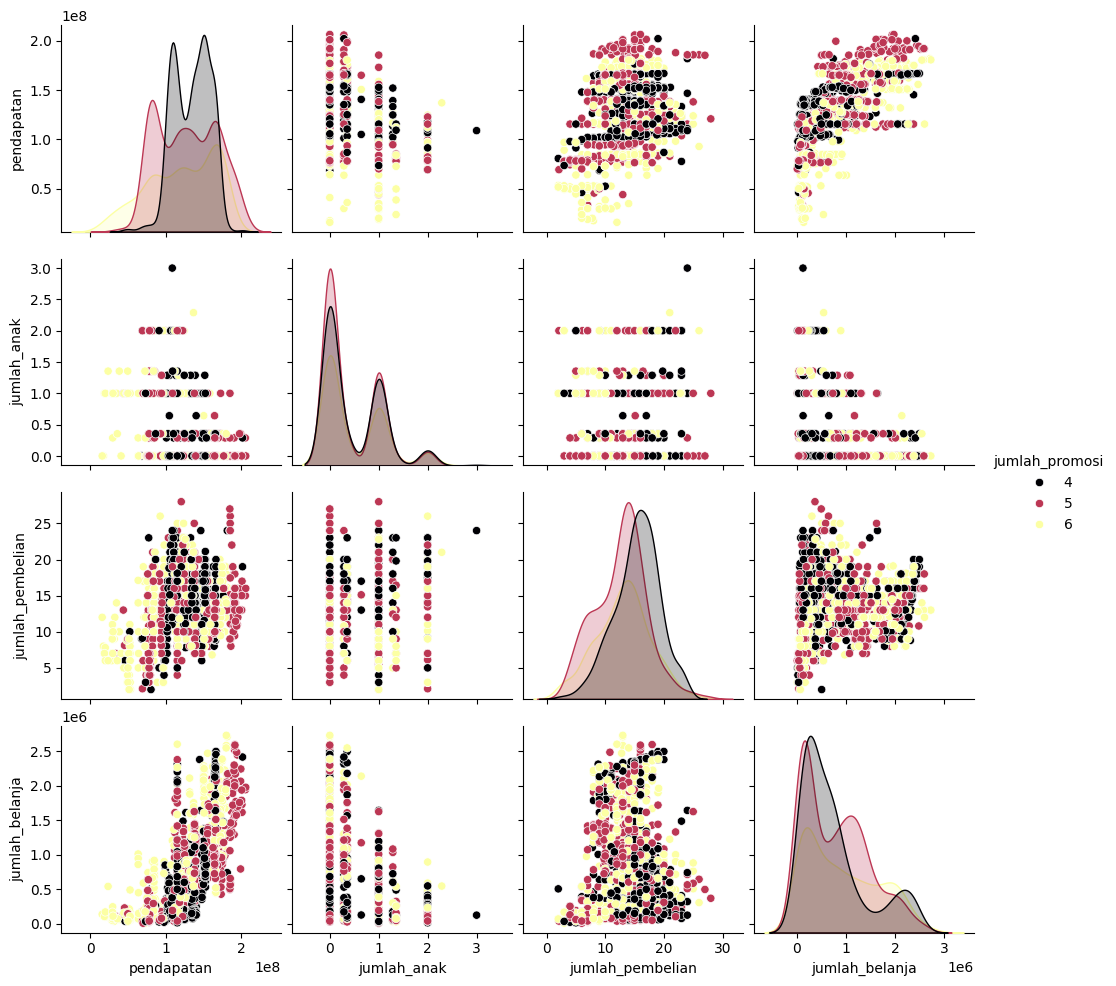

In [ ]:
# Assuming df_train_cleaning is your DataFrame
features = ['pendapatan', 'jumlah_anak', 'jumlah_pembelian', 'jumlah_belanja']  # List of features to visualize
sns.pairplot(df_subset2, vars=features, hue='jumlah_promosi', palette='inferno')
plt.show()

## d. Correlation Matrix

## e. Correlation Against Target

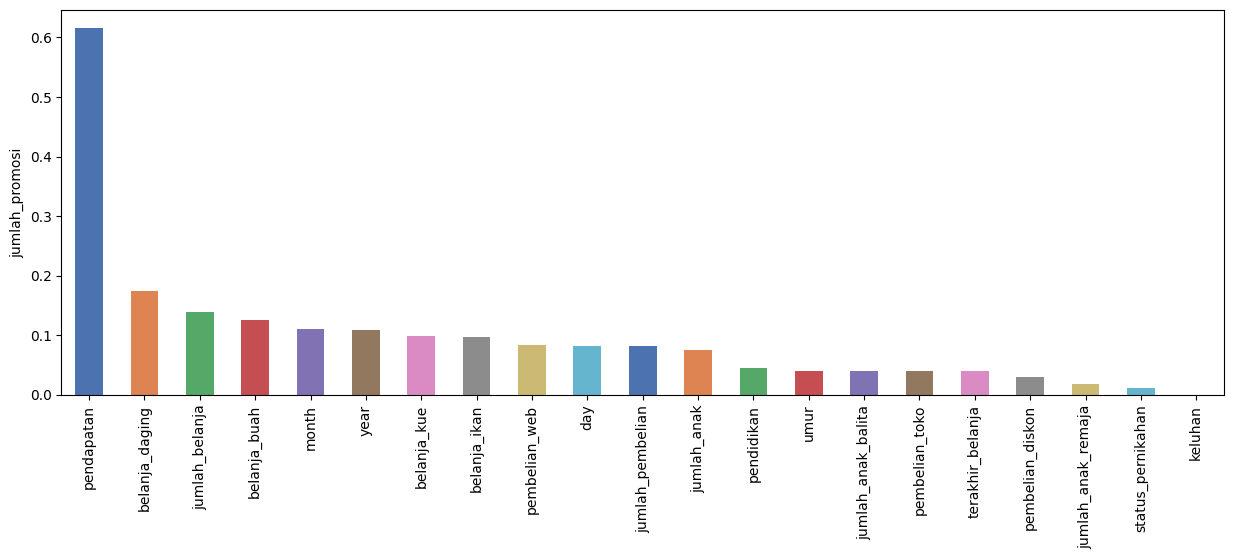

Mutual Info for pendapatan: 0.6153697424439284
Mutual Info for belanja_daging: 0.17491470693125555
Mutual Info for jumlah_belanja: 0.13935551531118984
Mutual Info for belanja_buah: 0.12511527520469112
Mutual Info for month: 0.11112635390279868
Mutual Info for year: 0.10944235786729717
Mutual Info for belanja_kue: 0.09916510159966574
Mutual Info for belanja_ikan: 0.09664009072299873
Mutual Info for pembelian_web: 0.08304355750664794
Mutual Info for day: 0.08198511885770232
Mutual Info for jumlah_pembelian: 0.08175854624762469
Mutual Info for jumlah_anak: 0.07530085034203804
Mutual Info for pendidikan: 0.04470832638169986
Mutual Info for umur: 0.04093644315263534
Mutual Info for jumlah_anak_balita: 0.04049783728590617
Mutual Info for pembelian_toko: 0.04005823063250036
Mutual Info for terakhir_belanja: 0.03974868693951672
Mutual Info for pembelian_diskon: 0.0307655891163936
Mutual Info for jumlah_anak_remaja: 0.01776504526738254
Top features with highest mutual correlation:
[['pendapatan

In [ ]:
from sklearn.feature_selection import mutual_info_classif

df_train_cleaning = df_merge_EDA[:len(df_train)].copy()
df_train_cleaning['jumlah_promosi'] = df_label.values
df_train_cleaning['jumlah_anak'] = df_train_cleaning['jumlah_anak_balita'] + df_train_cleaning['jumlah_anak_remaja']
df_train_cleaning['jumlah_pembelian'] = df_train_cleaning['pembelian_diskon'] + df_train_cleaning['pembelian_toko'] + df_train_cleaning['pembelian_web']
df_train_cleaning['jumlah_belanja'] = df_train_cleaning['belanja_daging'] + df_train_cleaning['belanja_buah'] + df_train_cleaning['belanja_kue'] + df_train_cleaning['belanja_ikan']
# to_drop = ['jumlah_anak_balita', 'jumlah_anak_remaja', 'pembelian_diskon', 'pembelian_toko', 'pembelian_web', 'belanja_daging', 'belanja_buah','belanja_kue','belanja_ikan']
# df_train_clean_droped = df_train_cleaning.drop(to_drop, axis=1, inplace=True)

dependentFeature = [['jumlah_promosi'], [df_train_cleaning['jumlah_promosi']]]
MutualSet = df_train_cleaning.loc[:, df_train_cleaning.columns != 'jumlah_promosi']

def findDependencyFeatures(name, labelset):
    mutual_info = mutual_info_classif(MutualSet, labelset)
    mutual_info = pd.Series(mutual_info)
    mutual_info.index = MutualSet.columns
    sorted_mutual_info = mutual_info.sort_values(ascending=False)
    ax = sorted_mutual_info.plot.bar(figsize=(15, 5), color=sns.color_palette('deep'))  # Use Seaborn's default color palette
    ax.set_ylabel(name)
    plt.show()
    # Select top 90th percentile mutual correlation features
    threshold = sorted_mutual_info.quantile(0.10)
    top_features = sorted_mutual_info[sorted_mutual_info >= threshold].index.tolist()

    # Print specific dependency values for each feature
    for feature in top_features:
        print(f"Mutual Info for {feature}: {sorted_mutual_info[feature]}")

    return top_features

top_features_list = []
for i in range(len(dependentFeature[0])):
    top_features = findDependencyFeatures(dependentFeature[0][i], dependentFeature[1][i])
    top_features_list.append(top_features)

print("Top features with highest mutual correlation:")
print(top_features_list)


Terlihat bahwa kolom tanggal_menjadi_anggota memiliki sangat banyak missing value sehingga perlu dihapus. Kolom lain juga masih memiliki missing value. Oleh karena itu, kolom yang lain ditangani menggunakan model dengan urutan berdasarkan korelasi terhadap jumlah promosi

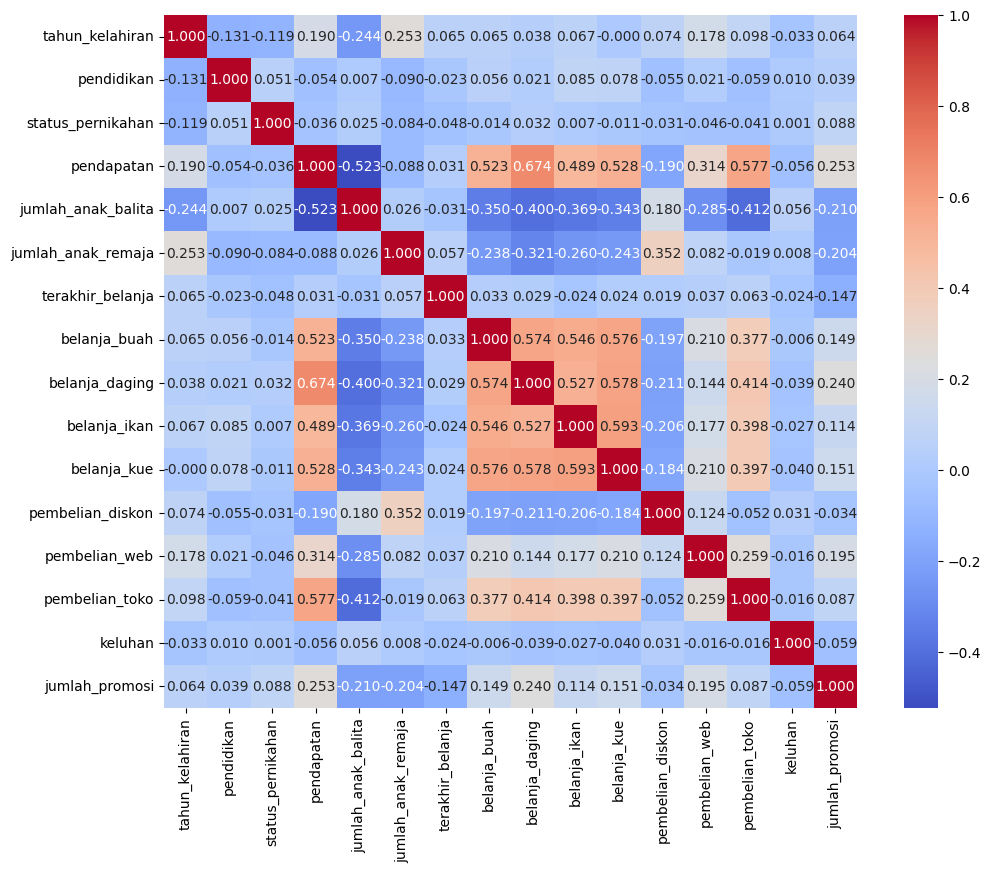

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df_train_cleaning.rename(columns={'umur': 'tahun_kelahiran'}).drop(columns=['year', 'month', 'day', 'jumlah_anak', 'jumlah_pembelian', 'jumlah_belanja']).corr()

# Plot the correlation matrix using a heatmap with formatted annotations
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='coolwarm', square=True)
# plt.title('Correlation Matrix')
plt.show()


# **3. Data Preprocessing**

Pada bagian ini data dilakukan pra-pemrosesan sebelum data dilatih pada model. Pra-Pemrosesan berupa normalisasi data, penanganan outlier, dan penanganan missing value.

## a. Data Normalization and Outlier Handling

In [ ]:
pendidikan_map = {
    'Sarjana': 2,
    'Magister': 3,
    'SMA': 1,
    'SMP': 0,
    'Doktor': 4,
}

status_pernikahan_map = {
    'Rencana Menikah': 1,
    'Menikah': 2,
    'Sendiri': 0,
    'Cerai': 3,
    'Cerai Mati': 4,
}

In [ ]:
df_merge = pd.concat([df_train, df_test.drop(columns='ID')], axis=0).reset_index(drop=True)

df_merge['tahun_kelahiran'] = 2024 - df_merge['tahun_kelahiran']
df_merge.rename(columns={'tahun_kelahiran': 'umur'}, inplace=True)

df_merge['pendidikan'] = df_merge['pendidikan'].replace('5', df_merge['pendidikan'].mode()[0])
df_merge['status_pernikahan'] = df_merge['status_pernikahan'].replace('5', df_merge['status_pernikahan'].mode()[0])

df_merge['pendidikan'] = df_merge['pendidikan'].map(pendidikan_map)
df_merge['status_pernikahan'] = df_merge['status_pernikahan'].map(status_pernikahan_map)

df_merge.drop(columns=['tanggal_menjadi_anggota'], inplace=True)

df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7635 entries, 0 to 7634
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   umur                7635 non-null   int64  
 1   pendidikan          7242 non-null   float64
 2   status_pernikahan   7241 non-null   float64
 3   pendapatan          7242 non-null   float64
 4   jumlah_anak_balita  7236 non-null   float64
 5   jumlah_anak_remaja  7221 non-null   float64
 6   terakhir_belanja    7262 non-null   float64
 7   belanja_buah        7268 non-null   float64
 8   belanja_daging      7262 non-null   float64
 9   belanja_ikan        7246 non-null   float64
 10  belanja_kue         7234 non-null   float64
 11  pembelian_diskon    7278 non-null   float64
 12  pembelian_web       7290 non-null   float64
 13  pembelian_toko      7280 non-null   float64
 14  keluhan             7246 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 894.9 KB


In [ ]:
df_merge_cleaned = df_merge.copy()
df_merge_cleaned['umur'] = df_merge_cleaned['umur'].apply(lambda x: 100 if x > 100 else x)
df_merge_cleaned['umur'] = (df_merge_cleaned['umur'] - df_merge_cleaned['umur'].min())/(df_merge_cleaned['umur'].max() - df_merge_cleaned['umur'].min())

df_merge_cleaned['pendidikan'] = (df_merge_cleaned['pendidikan'] - df_merge_cleaned['pendidikan'].mean())/df_merge_cleaned['pendidikan'].std()

df_merge_cleaned['status_pernikahan'] = (df_merge_cleaned['status_pernikahan'] - df_merge_cleaned['status_pernikahan'].mean())/df_merge_cleaned['status_pernikahan'].std()

max_pendapatan = df_train['pendapatan'].max()
df_merge_cleaned['pendapatan'] = df_merge_cleaned['pendapatan'].apply(lambda x: max_pendapatan if x > max_pendapatan else x)
df_merge_cleaned['pendapatan'] = (df_merge_cleaned['pendapatan'] - df_merge_cleaned['pendapatan'].mean())/df_merge_cleaned['pendapatan'].std()
df_merge_cleaned['pendapatan'] = df_merge_cleaned['pendapatan'].apply(lambda x: 3 if x > 3 else x)

df_merge_cleaned['jumlah_anak_balita'] = (df_merge_cleaned['jumlah_anak_balita'] - df_merge_cleaned['jumlah_anak_balita'].min())/(df_merge_cleaned['jumlah_anak_balita'].max() - df_merge_cleaned['jumlah_anak_balita'].min())

df_merge_cleaned['jumlah_anak_remaja'] = (df_merge_cleaned['jumlah_anak_remaja'] - df_merge_cleaned['jumlah_anak_remaja'].min())/(df_merge_cleaned['jumlah_anak_remaja'].max() - df_merge_cleaned['jumlah_anak_remaja'].min())

df_merge_cleaned['terakhir_belanja'] = (df_merge_cleaned['terakhir_belanja'] - df_merge_cleaned['terakhir_belanja'].mean())/df_merge_cleaned['terakhir_belanja'].std()

df_merge_cleaned['belanja_buah'] = (df_merge_cleaned['belanja_buah'] - df_merge_cleaned['belanja_buah'].min())/(df_merge_cleaned['belanja_buah'].max() - df_merge_cleaned['belanja_buah'].min())

df_merge_cleaned['belanja_daging'] = (df_merge_cleaned['belanja_daging'] - df_merge_cleaned['belanja_daging'].min())/(df_merge_cleaned['belanja_daging'].max() - df_merge_cleaned['belanja_daging'].min())

df_merge_cleaned['belanja_ikan'] = (df_merge_cleaned['belanja_ikan'] - df_merge_cleaned['belanja_ikan'].min())/(df_merge_cleaned['belanja_ikan'].max() - df_merge_cleaned['belanja_ikan'].min())

df_merge_cleaned['belanja_kue'] = (df_merge_cleaned['belanja_kue'] - df_merge_cleaned['belanja_kue'].min())/(df_merge_cleaned['belanja_kue'].max() - df_merge_cleaned['belanja_kue'].min())

df_merge_cleaned['pembelian_diskon'] = (df_merge_cleaned['pembelian_diskon'] - df_merge_cleaned['pembelian_diskon'].min())/(df_merge_cleaned['pembelian_diskon'].max() - df_merge_cleaned['pembelian_diskon'].min())

df_merge_cleaned['pembelian_web'] = (df_merge_cleaned['pembelian_web'] - df_merge_cleaned['pembelian_web'].mean())/df_merge_cleaned['pembelian_web'].std()

df_merge_cleaned['pembelian_toko'] = (df_merge_cleaned['pembelian_toko'] - df_merge_cleaned['pembelian_toko'].mean())/df_merge_cleaned['pembelian_toko'].std()


df_merge_cleaned.head()

umur  pendidikan  status_pernikahan  pendapatan  jumlah_anak_balita  \
0  0.352941   -0.330015          -0.210505         NaN                 0.0   
1  0.694118   -0.330015          -0.210505   -0.717621                 NaN   
2  0.505882   -0.330015           0.848013    0.286293                 0.0   
3  0.564706    0.795205          -0.210505    1.164976                 0.0   
4  0.458824   -0.330015          -0.210505    0.059286                 0.5   

   jumlah_anak_remaja  terakhir_belanja  belanja_buah  belanja_daging  \
0                 0.5               NaN      0.123762        0.074783   
1                 NaN          0.844112      0.014851        0.012754   
2                 0.0         -0.081716      0.287807        0.076070   
3                 0.0          1.584774      0.504950        0.462479   
4                 0.5          1.140377      0.221617        0.089337   

   belanja_ikan  belanja_kue  pembelian_diskon  pembelian_web  pembelian_toko  \
0      0.081363     0.037313              0.10      -0.825406       -0.246688   
1      0.130180     0.037313              0.45       0.521781       -0.554414   
2      0.154989     0.268504              0.05      -1.162202        0.368764   
3      0.044603     0.232159              0.00       0.858577        0.676490   
4      0.064926     0.062481              0.35       0.521781       -0.246688   

   keluhan  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0

In [ ]:
df_merge_cleaned.to_csv('data/speechless/df_merge_raw.csv', index=False)

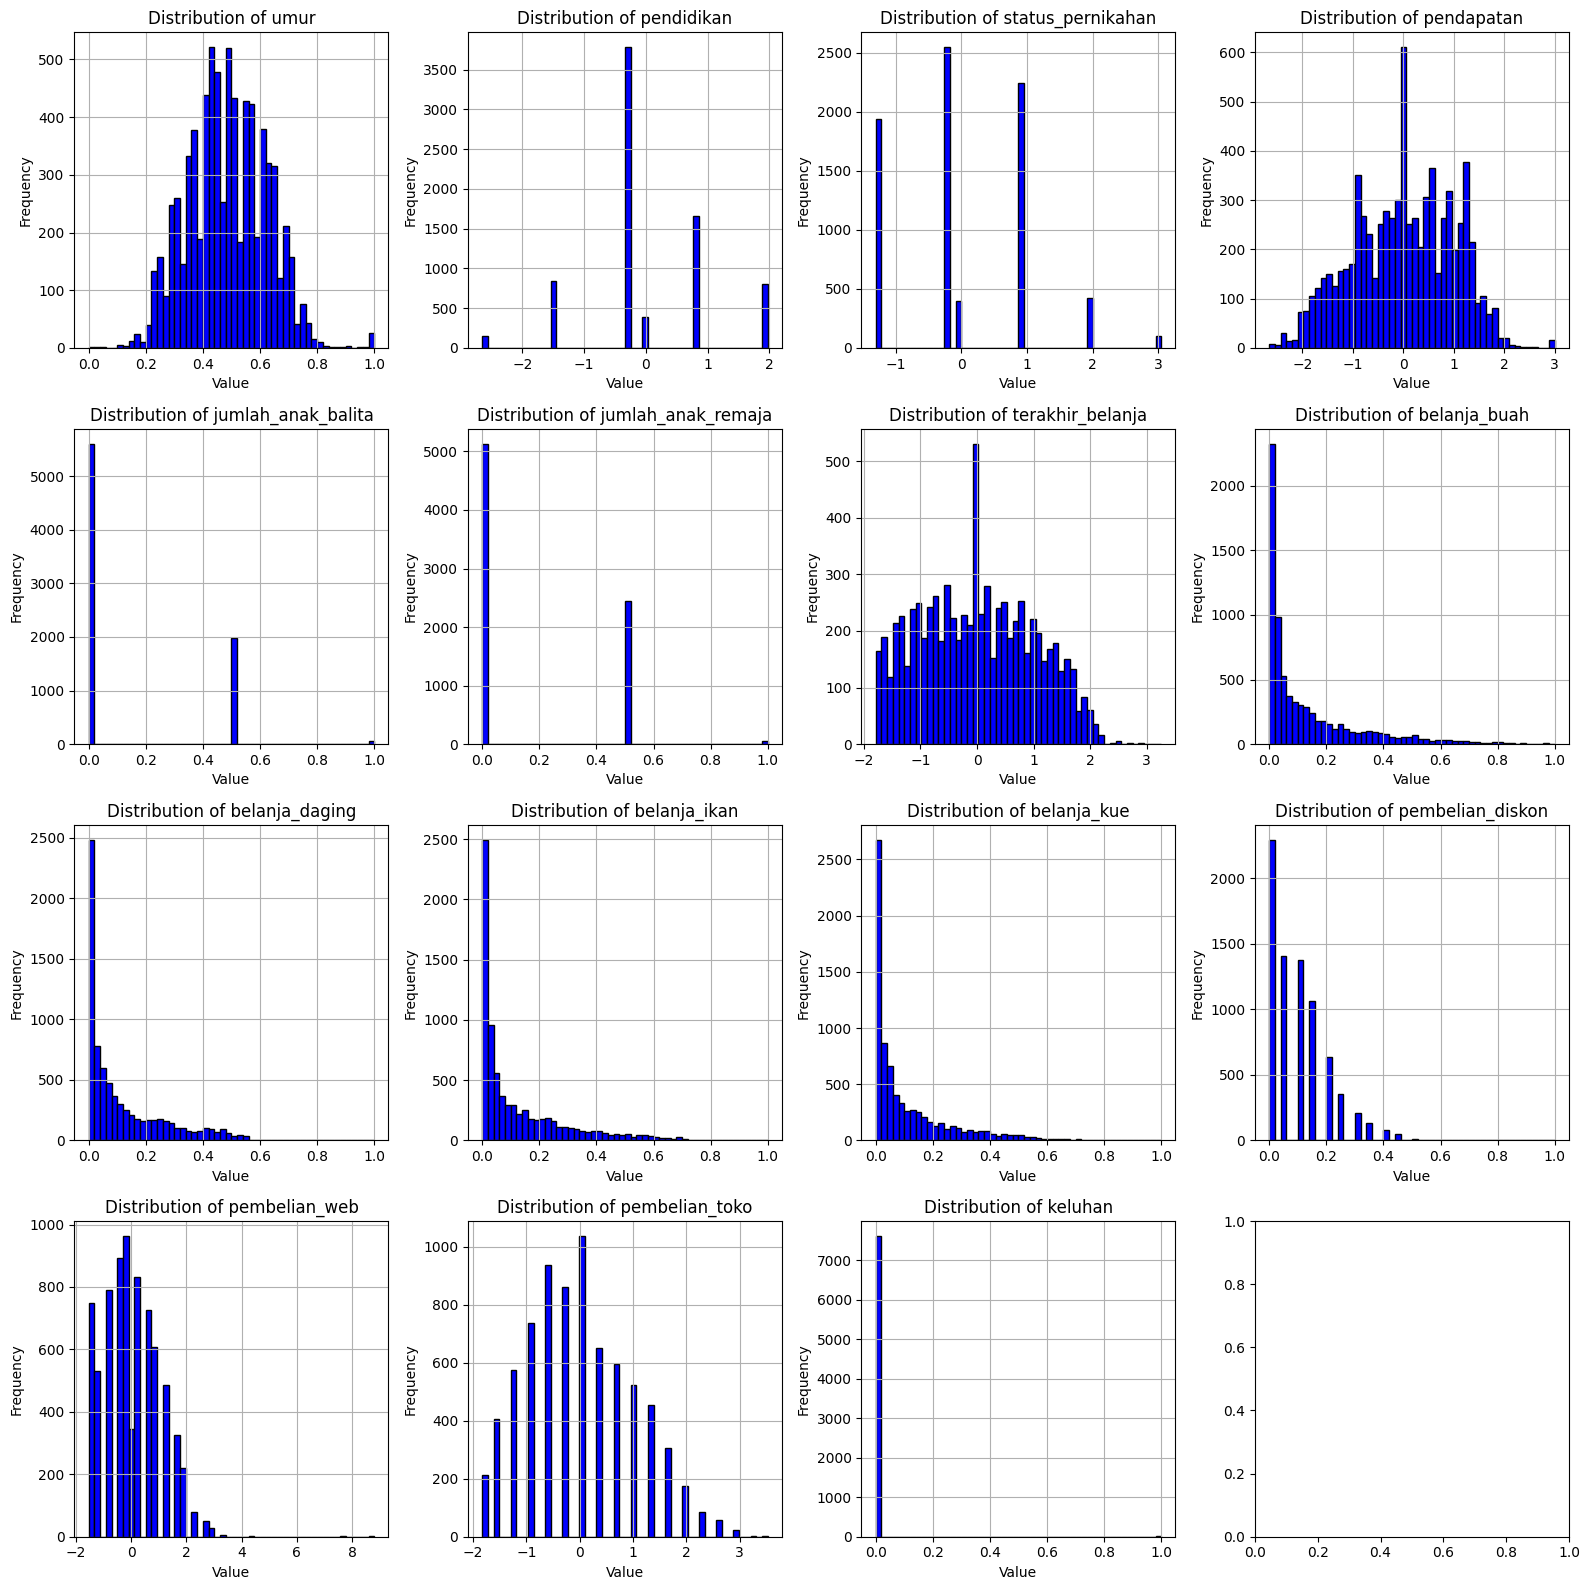

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_merge_cleaned is your DataFrame
num_cols = len(df_merge_cleaned.columns)
num_rows = (num_cols + 3) // 4  # Calculate number of rows needed

fig, axs = plt.subplots(num_rows, 4, figsize=(16, num_rows*4))  # Adjust figsize as needed

for i in range(num_rows):
    for j in range(4):
        col_index = i * 4 + j
        if col_index < num_cols:
            temp_val = df_merge_cleaned[df_merge_cleaned.columns[col_index]].dropna().values
            axs[i, j].hist(temp_val, bins=50, color='blue', edgecolor='black')  # Adjust the number of bins as per your preference
            axs[i, j].set_title(f'Distribution of {df_merge_cleaned.columns[col_index]}')
            axs[i, j].set_xlabel('Value')
            axs[i, j].set_ylabel('Frequency')
            axs[i, j].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
df_merge_cleaned.describe()

umur   pendidikan  status_pernikahan   pendapatan  \
count  7635.000000  7635.000000        7635.000000  7635.000000   
mean      0.484139    -0.000763          -0.000471    -0.003911   
std       0.136472     0.982126           0.976804     0.984319   
min       0.000000    -2.580453          -1.269023    -2.589767   
25%       0.388235    -0.330015          -1.269023    -0.780729   
50%       0.482353    -0.330015          -0.210505     0.046050   
75%       0.588235     0.795205           0.848013     0.816963   
max       1.000000     1.920424           2.965049     3.000000   

       jumlah_anak_balita  jumlah_anak_remaja  terakhir_belanja  belanja_buah  \
count         7635.000000         7635.000000       7635.000000   7635.000000   
mean             0.143718            0.177180         -0.000734      0.147988   
std              0.230322            0.243867          0.982907      0.182633   
min              0.000000            0.000000         -1.748205      0.000000   
25%              0.000000            0.000000         -0.822377      0.019503   
50%              0.000000            0.000000         -0.007649      0.069307   
75%              0.500000            0.500000          0.770046      0.213933   
max              1.000000            1.000000          3.177197      1.000000   

       belanja_daging  belanja_ikan  belanja_kue  pembelian_diskon  \
count     7635.000000   7635.000000  7635.000000       7635.000000   
mean         0.127745      0.133954     0.117720          0.105702   
std          0.145569      0.161994     0.144496          0.102975   
min          0.000000      0.000000     0.000000          0.000000   
25%          0.015264      0.016273     0.014925          0.000000   
50%          0.065838      0.061670     0.054382          0.100000   
75%          0.202585      0.205034     0.169728          0.150000   
max          1.000000      1.000000     1.000000          1.000000   

       pembelian_web  pembelian_toko      keluhan  
count    7635.000000     7635.000000  7635.000000  
mean        0.002914       -0.000970     0.003872  
std         0.987805        0.985460     0.060473  
min        -1.498999       -1.785318     0.000000  
25%        -0.825406       -0.862140     0.000000  
50%        -0.151813       -0.246688     0.000000  
75%         0.521781        0.676490     0.000000  
max         8.604897        3.446024     1.000000

## b. Fill Missing Value

In [ ]:
pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.5/308.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.5/427.5 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 89.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Now, you can access your Google Drive files like this:

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from autogluon.tabular import TabularPredictor
pd.set_option('display.max_columns', None)


In [ ]:
df_merge = pd.read_csv("/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/data/processed/df_merge_raw.csv")
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7635 entries, 0 to 7634
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   umur                7635 non-null   float64
 1   pendidikan          7242 non-null   float64
 2   status_pernikahan   7241 non-null   float64
 3   pendapatan          7242 non-null   float64
 4   jumlah_anak_balita  7236 non-null   float64
 5   jumlah_anak_remaja  7221 non-null   float64
 6   terakhir_belanja    7262 non-null   float64
 7   belanja_buah        7268 non-null   float64
 8   belanja_daging      7262 non-null   float64
 9   belanja_ikan        7246 non-null   float64
 10  belanja_kue         7234 non-null   float64
 11  pembelian_diskon    7278 non-null   float64
 12  pembelian_web       7290 non-null   float64
 13  pembelian_toko      7280 non-null   float64
 14  keluhan             7246 non-null   float64
dtypes: float64(15)
memory usage: 894.9 KB


### i. Fill for column 'keluhan'

In [ ]:
# Step 1: Remove rows with NaN values in keluhan
df_clean = df_merge.dropna(subset=['keluhan'])

# # Step 2: Splitting the data into features (X) and target variable (y)
# X = df_clean[[val for val in df_clean.columns if val != 'keluhan']]  # Features
# y = df_clean['keluhan']     # Target variable

# temp_merge = pd.concat([X, y], axis=1).head()

predictor_keluhan = TabularPredictor(label='keluhan', path='/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/keluhan')

predictor_keluhan.fit(
    df_clean
)

X_missing = df_merge[df_merge['keluhan'].isnull()][[val for val in df_clean.columns if val != 'keluhan']]  # Features with missing 'keluhan'
predicted_values = predictor_keluhan.predict(X_missing)

df_merge.loc[df_merge['keluhan'].isnull(), 'keluhan'] = predicted_values


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/keluhan"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Avail:   

### ii. Fill for column 'pembelian_diskon'

In [ ]:
# Step 1: Remove rows with NaN values in pembelian_diskon
df_clean = df_merge.dropna(subset=['pembelian_diskon'])

# # Step 2: Splitting the data into features (X) and target variable (y)
# X = df_clean[[val for val in df_clean.columns if val != 'pembelian_diskon']]  # Features
# y = df_clean['pembelian_diskon']     # Target variable

# temp_merge = pd.concat([X, y], axis=1).head()

predictor_pembelian_diskon = TabularPredictor(label='pembelian_diskon', path='/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/pembelian_diskon')

predictor_pembelian_diskon.fit(
    df_clean
)

X_missing = df_merge[df_merge['pembelian_diskon'].isnull()][[val for val in df_clean.columns if val != 'pembelian_diskon']]  # Features with missing 'pembelian_diskon'
predicted_values = predictor_pembelian_diskon.predict(X_missing)

df_merge.loc[df_merge['pembelian_diskon'].isnull(), 'pembelian_diskon'] = predicted_values


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/pembelian_diskon"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory 

[1000]	valid_set's rmse: 0.0604939
[2000]	valid_set's rmse: 0.0587478
[3000]	valid_set's rmse: 0.0582782
[4000]	valid_set's rmse: 0.0581196
[5000]	valid_set's rmse: 0.0580177
[6000]	valid_set's rmse: 0.0579364
[7000]	valid_set's rmse: 0.0579081
[8000]	valid_set's rmse: 0.0579128


	-0.0579	 = Validation score   (-root_mean_squared_error)
	15.82s	 = Training   runtime
	0.93s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.0607805
[2000]	valid_set's rmse: 0.0603294


	-0.0602	 = Validation score   (-root_mean_squared_error)
	4.15s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.0592	 = Validation score   (-root_mean_squared_error)
	16.83s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
	-0.0576	 = Validation score   (-root_mean_squared_error)
	364.73s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.0579	 = Validation score   (-root_mean_squared_error)
	8.15s	 = Training   runtime
	0.34s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.0672	 = Validation score   (-root_mean_squared_error)
	23.98s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: XGBoost ...
	-0.0605	 = Validation score   (-root_mean_squared_error)
	14.74s	 = Training   runtime
	0.26s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.0668	 = Validation score   (-root_mean_squared_error)
	99.03s	 = Training   runtime
	0.02s	 = Validatio

[1000]	valid_set's rmse: 0.0578418


	-0.0578	 = Validation score   (-root_mean_squared_error)
	10.87s	 = Training   runtime
	0.18s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBMXT': 0.235, 'CatBoost': 0.235, 'ExtraTreesMSE': 0.235, 'LightGBMLarge': 0.176, 'RandomForestMSE': 0.059, 'NeuralNetTorch': 0.059}
	-0.0551	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 565.97s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/pembelian_diskon")


### iii. Fill for column 'status_pernikahan'

In [ ]:
df_clean = df_merge.dropna(subset=['status_pernikahan'])

predictor_status_pernikahan = TabularPredictor(label='status_pernikahan', path='/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/status_pernikahan')

predictor_status_pernikahan.fit(
    df_clean
)

X_missing = df_merge[df_merge['status_pernikahan'].isnull()][[val for val in df_clean.columns if val != 'status_pernikahan']]  # Features with missing 'status_pernikahan'
predicted_values = predictor_status_pernikahan.predict(X_missing)

df_merge.loc[df_merge['status_pernikahan'].isnull(), 'status_pernikahan'] = predicted_values


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/status_pernikahan"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory

[1000]	valid_set's rmse: 0.765561
[2000]	valid_set's rmse: 0.748972
[3000]	valid_set's rmse: 0.743409
[4000]	valid_set's rmse: 0.740393
[5000]	valid_set's rmse: 0.737483
[6000]	valid_set's rmse: 0.735461
[7000]	valid_set's rmse: 0.734562
[8000]	valid_set's rmse: 0.733844
[9000]	valid_set's rmse: 0.733347
[10000]	valid_set's rmse: 0.733146


	-0.733	 = Validation score   (-root_mean_squared_error)
	19.08s	 = Training   runtime
	1.53s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.747332
[2000]	valid_set's rmse: 0.734812
[3000]	valid_set's rmse: 0.730439
[4000]	valid_set's rmse: 0.728406
[5000]	valid_set's rmse: 0.727705
[6000]	valid_set's rmse: 0.727288
[7000]	valid_set's rmse: 0.727168
[8000]	valid_set's rmse: 0.726988
[9000]	valid_set's rmse: 0.726868
[10000]	valid_set's rmse: 0.726794


	-0.7268	 = Validation score   (-root_mean_squared_error)
	21.47s	 = Training   runtime
	1.08s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.7179	 = Validation score   (-root_mean_squared_error)
	16.77s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: CatBoost ...
	-0.7346	 = Validation score   (-root_mean_squared_error)
	160.43s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.7267	 = Validation score   (-root_mean_squared_error)
	3.68s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.8098	 = Validation score   (-root_mean_squared_error)
	11.58s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: XGBoost ...
	-0.7546	 = Validation score   (-root_mean_squared_error)
	12.79s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.8522	 = Validation score   (-root_mean_squared_error)
	36.18s	 = Training   runtime
	0.02s	 = Validatio

[1000]	valid_set's rmse: 0.728508
[2000]	valid_set's rmse: 0.725648
[3000]	valid_set's rmse: 0.725226
[4000]	valid_set's rmse: 0.725159
[5000]	valid_set's rmse: 0.72515
[6000]	valid_set's rmse: 0.725146
[7000]	valid_set's rmse: 0.725145
[8000]	valid_set's rmse: 0.725145
[9000]	valid_set's rmse: 0.725145
[10000]	valid_set's rmse: 0.725145


	-0.7251	 = Validation score   (-root_mean_squared_error)
	62.49s	 = Training   runtime
	3.64s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'RandomForestMSE': 0.368, 'LightGBMXT': 0.211, 'LightGBM': 0.211, 'CatBoost': 0.105, 'ExtraTreesMSE': 0.105}
	-0.7017	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 365.89s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/status_pernikahan")


### iv. Fill for column 'jumlah_anak_balita'

In [ ]:
df_clean = df_merge.dropna(subset=['jumlah_anak_balita'])

predictor_jumlah_anak_balita = TabularPredictor(label='jumlah_anak_balita', path='/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/jumlah_anak_balita')

predictor_jumlah_anak_balita.fit(
    df_clean
)

X_missing = df_merge[df_merge['jumlah_anak_balita'].isnull()][[val for val in df_clean.columns if val != 'jumlah_anak_balita']]  # Features with missing 'jumlah_anak_balita'
predicted_values = predictor_jumlah_anak_balita.predict(X_missing)

df_merge.loc[df_merge['jumlah_anak_balita'].isnull(), 'jumlah_anak_balita'] = predicted_values


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/jumlah_anak_balita"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memor

[1000]	valid_set's rmse: 0.154781
[2000]	valid_set's rmse: 0.151909
[3000]	valid_set's rmse: 0.151084
[4000]	valid_set's rmse: 0.150818
[5000]	valid_set's rmse: 0.150311
[6000]	valid_set's rmse: 0.150074
[7000]	valid_set's rmse: 0.149943
[8000]	valid_set's rmse: 0.14987
[9000]	valid_set's rmse: 0.149809
[10000]	valid_set's rmse: 0.149874


	-0.1498	 = Validation score   (-root_mean_squared_error)
	20.17s	 = Training   runtime
	1.61s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.148309
[2000]	valid_set's rmse: 0.147001
[3000]	valid_set's rmse: 0.146559
[4000]	valid_set's rmse: 0.146476
[5000]	valid_set's rmse: 0.146373
[6000]	valid_set's rmse: 0.146355
[7000]	valid_set's rmse: 0.146368


	-0.1464	 = Validation score   (-root_mean_squared_error)
	16.69s	 = Training   runtime
	0.53s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.1534	 = Validation score   (-root_mean_squared_error)
	12.61s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: CatBoost ...
	-0.1497	 = Validation score   (-root_mean_squared_error)
	159.23s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.149	 = Validation score   (-root_mean_squared_error)
	4.2s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.1674	 = Validation score   (-root_mean_squared_error)
	8.88s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-0.1488	 = Validation score   (-root_mean_squared_error)
	9.16s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.1946	 = Validation score   (-root_mean_squared_error)
	29.78s	 = Training   runtime
	0.02s	 = Validation r

[1000]	valid_set's rmse: 0.148099
[2000]	valid_set's rmse: 0.147999
[3000]	valid_set's rmse: 0.147984
[4000]	valid_set's rmse: 0.147983


	-0.148	 = Validation score   (-root_mean_squared_error)
	29.41s	 = Training   runtime
	0.55s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBM': 0.278, 'ExtraTreesMSE': 0.222, 'XGBoost': 0.222, 'LightGBMXT': 0.167, 'LightGBMLarge': 0.111}
	-0.1429	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 299.5s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/jumlah_anak_balita")


### v. Fill for column 'pembelian_toko'

In [ ]:
df_clean = df_merge.dropna(subset=['pembelian_toko'])

predictor_pembelian_toko = TabularPredictor(label='pembelian_toko', path='/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/pembelian_toko')

predictor_pembelian_toko.fit(
    df_clean
)

X_missing = df_merge[df_merge['pembelian_toko'].isnull()][[val for val in df_clean.columns if val != 'pembelian_toko']]  # Features with missing 'pembelian_toko'
predicted_values = predictor_pembelian_toko.predict(X_missing)

df_merge.loc[df_merge['pembelian_toko'].isnull(), 'pembelian_toko'] = predicted_values


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/pembelian_toko"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Av

[1000]	valid_set's rmse: 0.547548
[2000]	valid_set's rmse: 0.533285
[3000]	valid_set's rmse: 0.526564
[4000]	valid_set's rmse: 0.520946
[5000]	valid_set's rmse: 0.518334
[6000]	valid_set's rmse: 0.51675
[7000]	valid_set's rmse: 0.515823
[8000]	valid_set's rmse: 0.514958
[9000]	valid_set's rmse: 0.514373
[10000]	valid_set's rmse: 0.51407


	-0.5141	 = Validation score   (-root_mean_squared_error)
	19.03s	 = Training   runtime
	1.38s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.517591
[2000]	valid_set's rmse: 0.506145
[3000]	valid_set's rmse: 0.502825
[4000]	valid_set's rmse: 0.501572
[5000]	valid_set's rmse: 0.500901
[6000]	valid_set's rmse: 0.500573
[7000]	valid_set's rmse: 0.500432
[8000]	valid_set's rmse: 0.50034
[9000]	valid_set's rmse: 0.500233
[10000]	valid_set's rmse: 0.500191


	-0.5002	 = Validation score   (-root_mean_squared_error)
	21.47s	 = Training   runtime
	1.05s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.5325	 = Validation score   (-root_mean_squared_error)
	17.13s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: CatBoost ...
	-0.5275	 = Validation score   (-root_mean_squared_error)
	161.51s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.529	 = Validation score   (-root_mean_squared_error)
	5.71s	 = Training   runtime
	0.19s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.5955	 = Validation score   (-root_mean_squared_error)
	9.22s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-0.5308	 = Validation score   (-root_mean_squared_error)
	15.53s	 = Training   runtime
	0.3s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.5551	 = Validation score   (-root_mean_squared_error)
	105.04s	 = Training   runtime
	0.02s	 = Validation

[1000]	valid_set's rmse: 0.50033
[2000]	valid_set's rmse: 0.498144
[3000]	valid_set's rmse: 0.497996
[4000]	valid_set's rmse: 0.49797
[5000]	valid_set's rmse: 0.497968
[6000]	valid_set's rmse: 0.497967
[7000]	valid_set's rmse: 0.497966
[8000]	valid_set's rmse: 0.497966
[9000]	valid_set's rmse: 0.497966


	-0.498	 = Validation score   (-root_mean_squared_error)
	69.04s	 = Training   runtime
	3.13s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBM': 0.391, 'LightGBMLarge': 0.348, 'NeuralNetTorch': 0.217, 'LightGBMXT': 0.043}
	-0.4872	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 442.56s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/pembelian_toko")


### vi. Fill for column 'jumlah_anak_remaja'

In [ ]:
df_clean = df_merge.dropna(subset=['jumlah_anak_remaja'])

predictor_jumlah_anak_remaja = TabularPredictor(label='jumlah_anak_remaja', path='/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/jumlah_anak_remaja')

predictor_jumlah_anak_remaja.fit(
    df_clean
)

X_missing = df_merge[df_merge['jumlah_anak_remaja'].isnull()][[val for val in df_clean.columns if val != 'jumlah_anak_remaja']]  # Features with missing 'jumlah_anak_remaja'
predicted_values = predictor_jumlah_anak_remaja.predict(X_missing)

df_merge.loc[df_merge['jumlah_anak_remaja'].isnull(), 'jumlah_anak_remaja'] = predicted_values


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/jumlah_anak_remaja"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memor

[1000]	valid_set's rmse: 0.147609
[2000]	valid_set's rmse: 0.145171
[3000]	valid_set's rmse: 0.143987
[4000]	valid_set's rmse: 0.143391
[5000]	valid_set's rmse: 0.142895
[6000]	valid_set's rmse: 0.142769
[7000]	valid_set's rmse: 0.142735
[8000]	valid_set's rmse: 0.142584
[9000]	valid_set's rmse: 0.142541
[10000]	valid_set's rmse: 0.142502


	-0.1425	 = Validation score   (-root_mean_squared_error)
	21.24s	 = Training   runtime
	1.0s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.140765
[2000]	valid_set's rmse: 0.139094
[3000]	valid_set's rmse: 0.138802
[4000]	valid_set's rmse: 0.13871
[5000]	valid_set's rmse: 0.13873


	-0.1387	 = Validation score   (-root_mean_squared_error)
	12.71s	 = Training   runtime
	0.36s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.1456	 = Validation score   (-root_mean_squared_error)
	12.14s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
	-0.1437	 = Validation score   (-root_mean_squared_error)
	171.82s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.1452	 = Validation score   (-root_mean_squared_error)
	2.37s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.1595	 = Validation score   (-root_mean_squared_error)
	11.14s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-0.1483	 = Validation score   (-root_mean_squared_error)
	4.23s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.1859	 = Validation score   (-root_mean_squared_error)
	60.99s	 = Training   runtime
	0.02s	 = Validation

[1000]	valid_set's rmse: 0.133576
[2000]	valid_set's rmse: 0.133419
[3000]	valid_set's rmse: 0.133412
[4000]	valid_set's rmse: 0.133406
[5000]	valid_set's rmse: 0.133405
[6000]	valid_set's rmse: 0.133405
[7000]	valid_set's rmse: 0.133405


	-0.1334	 = Validation score   (-root_mean_squared_error)
	51.68s	 = Training   runtime
	1.73s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBMLarge': 0.68, 'LightGBMXT': 0.12, 'LightGBM': 0.12, 'KNeighborsDist': 0.04, 'NeuralNetTorch': 0.04}
	-0.1326	 = Validation score   (-root_mean_squared_error)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 360.05s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/jumlah_anak_remaja")


### vii. Fill for column 'pendidikan'

In [ ]:
df_clean = df_merge.dropna(subset=['pendidikan'])

predictor_pendidikan = TabularPredictor(label='pendidikan', path='/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/pendidikan')

predictor_pendidikan.fit(
    df_clean
)

X_missing = df_merge[df_merge['pendidikan'].isnull()][[val for val in df_clean.columns if val != 'pendidikan']]  # Features with missing 'pendidikan'
predicted_values = predictor_pendidikan.predict(X_missing)

df_merge.loc[df_merge['pendidikan'].isnull(), 'pendidikan'] = predicted_values


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/pendidikan"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Avail:

[1000]	valid_set's rmse: 0.689085
[2000]	valid_set's rmse: 0.675672
[3000]	valid_set's rmse: 0.669576
[4000]	valid_set's rmse: 0.668095
[5000]	valid_set's rmse: 0.667912
[6000]	valid_set's rmse: 0.667312
[7000]	valid_set's rmse: 0.667654
[8000]	valid_set's rmse: 0.667832


	-0.667	 = Validation score   (-root_mean_squared_error)
	17.11s	 = Training   runtime
	0.62s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.662059


	-0.657	 = Validation score   (-root_mean_squared_error)
	5.97s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.6855	 = Validation score   (-root_mean_squared_error)
	16.83s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
	-0.6556	 = Validation score   (-root_mean_squared_error)
	166.05s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.6849	 = Validation score   (-root_mean_squared_error)
	3.53s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.7745	 = Validation score   (-root_mean_squared_error)
	10.78s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-0.6811	 = Validation score   (-root_mean_squared_error)
	17.04s	 = Training   runtime
	0.37s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.828	 = Validation score   (-root_mean_squared_error)
	44.12s	 = Training   runtime
	0.02s	 = Validation 

[1000]	valid_set's rmse: 0.650161
[2000]	valid_set's rmse: 0.649067
[3000]	valid_set's rmse: 0.648945


	-0.6489	 = Validation score   (-root_mean_squared_error)
	27.66s	 = Training   runtime
	0.44s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBMLarge': 0.4, 'CatBoost': 0.32, 'LightGBMXT': 0.12, 'LightGBM': 0.12, 'NeuralNetTorch': 0.04}
	-0.6354	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 315.8s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/pendidikan")


### viii. Fill for column 'terakhir_belanja'

In [ ]:
df_clean = df_merge.dropna(subset=['terakhir_belanja'])

predictor_terakhir_belanja = TabularPredictor(label='terakhir_belanja', path='/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/terakhir_belanja')

predictor_terakhir_belanja.fit(
    df_clean
)

X_missing = df_merge[df_merge['terakhir_belanja'].isnull()][[val for val in df_clean.columns if val != 'terakhir_belanja']]  # Features with missing 'terakhir_belanja'
predicted_values = predictor_terakhir_belanja.predict(X_missing)

df_merge.loc[df_merge['terakhir_belanja'].isnull(), 'terakhir_belanja'] = predicted_values


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/terakhir_belanja"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory 

[1000]	valid_set's rmse: 0.781452
[2000]	valid_set's rmse: 0.754096
[3000]	valid_set's rmse: 0.744714
[4000]	valid_set's rmse: 0.739213
[5000]	valid_set's rmse: 0.734812
[6000]	valid_set's rmse: 0.732285
[7000]	valid_set's rmse: 0.730058
[8000]	valid_set's rmse: 0.72876
[9000]	valid_set's rmse: 0.728237
[10000]	valid_set's rmse: 0.727662


	-0.7277	 = Validation score   (-root_mean_squared_error)
	23.41s	 = Training   runtime
	1.81s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.737258
[2000]	valid_set's rmse: 0.717442
[3000]	valid_set's rmse: 0.713977
[4000]	valid_set's rmse: 0.712116
[5000]	valid_set's rmse: 0.711733
[6000]	valid_set's rmse: 0.711588
[7000]	valid_set's rmse: 0.711378
[8000]	valid_set's rmse: 0.711374
[9000]	valid_set's rmse: 0.711247
[10000]	valid_set's rmse: 0.711205


	-0.7112	 = Validation score   (-root_mean_squared_error)
	23.84s	 = Training   runtime
	1.23s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.724	 = Validation score   (-root_mean_squared_error)
	19.64s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: CatBoost ...
	-0.7381	 = Validation score   (-root_mean_squared_error)
	167.86s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.7345	 = Validation score   (-root_mean_squared_error)
	7.86s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.833	 = Validation score   (-root_mean_squared_error)
	8.54s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: XGBoost ...
	-0.7566	 = Validation score   (-root_mean_squared_error)
	14.75s	 = Training   runtime
	0.36s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.7981	 = Validation score   (-root_mean_squared_error)
	57.94s	 = Training   runtime
	0.02s	 = Validation 

[1000]	valid_set's rmse: 0.711383
[2000]	valid_set's rmse: 0.708809
[3000]	valid_set's rmse: 0.708434
[4000]	valid_set's rmse: 0.708418
[5000]	valid_set's rmse: 0.70841
[6000]	valid_set's rmse: 0.708407
[7000]	valid_set's rmse: 0.708406
[8000]	valid_set's rmse: 0.708406
[9000]	valid_set's rmse: 0.708405
[10000]	valid_set's rmse: 0.708405


	-0.7084	 = Validation score   (-root_mean_squared_error)
	76.55s	 = Training   runtime
	2.32s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBM': 0.4, 'NeuralNetTorch': 0.2, 'LightGBMLarge': 0.2, 'KNeighborsDist': 0.1, 'LightGBMXT': 0.05, 'RandomForestMSE': 0.05}
	-0.6875	 = Validation score   (-root_mean_squared_error)
	0.05s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 421.54s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/terakhir_belanja")


### ix. Fill for column 'pembelian_web'

In [ ]:
df_clean = df_merge.dropna(subset=['pembelian_web'])

predictor_pembelian_web = TabularPredictor(label='pembelian_web', path='/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/pembelian_web')

predictor_pembelian_web.fit(
    df_clean
)

X_missing = df_merge[df_merge['pembelian_web'].isnull()][[val for val in df_clean.columns if val != 'pembelian_web']]  # Features with missing 'pembelian_web'
predicted_values = predictor_pembelian_web.predict(X_missing)

df_merge.loc[df_merge['pembelian_web'].isnull(), 'pembelian_web'] = predicted_values


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/pembelian_web"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Ava

[1000]	valid_set's rmse: 0.589366
[2000]	valid_set's rmse: 0.562327
[3000]	valid_set's rmse: 0.552313
[4000]	valid_set's rmse: 0.547864
[5000]	valid_set's rmse: 0.546188
[6000]	valid_set's rmse: 0.544504
[7000]	valid_set's rmse: 0.543989
[8000]	valid_set's rmse: 0.543096
[9000]	valid_set's rmse: 0.542267
[10000]	valid_set's rmse: 0.54173


	-0.5417	 = Validation score   (-root_mean_squared_error)
	20.47s	 = Training   runtime
	0.99s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.554627
[2000]	valid_set's rmse: 0.538793
[3000]	valid_set's rmse: 0.535725
[4000]	valid_set's rmse: 0.533962
[5000]	valid_set's rmse: 0.533049
[6000]	valid_set's rmse: 0.532794
[7000]	valid_set's rmse: 0.53261
[8000]	valid_set's rmse: 0.532562
[9000]	valid_set's rmse: 0.532497
[10000]	valid_set's rmse: 0.532426


	-0.5324	 = Validation score   (-root_mean_squared_error)
	24.49s	 = Training   runtime
	1.06s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.5805	 = Validation score   (-root_mean_squared_error)
	17.19s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: CatBoost ...
	-0.5382	 = Validation score   (-root_mean_squared_error)
	171.28s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.5595	 = Validation score   (-root_mean_squared_error)
	4.22s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.6211	 = Validation score   (-root_mean_squared_error)
	10.89s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-0.554	 = Validation score   (-root_mean_squared_error)
	11.38s	 = Training   runtime
	0.27s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.6364	 = Validation score   (-root_mean_squared_error)
	46.54s	 = Training   runtime
	0.02s	 = Validatio

[1000]	valid_set's rmse: 0.544448
[2000]	valid_set's rmse: 0.541832
[3000]	valid_set's rmse: 0.541646
[4000]	valid_set's rmse: 0.541617
[5000]	valid_set's rmse: 0.54161
[6000]	valid_set's rmse: 0.54161


	-0.5416	 = Validation score   (-root_mean_squared_error)
	54.86s	 = Training   runtime
	0.88s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBM': 0.4, 'LightGBMXT': 0.2, 'CatBoost': 0.2, 'ExtraTreesMSE': 0.15, 'NeuralNetTorch': 0.05}
	-0.5186	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 374.75s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/pembelian_web")


### x. Fill for column 'belanja_ikan'

In [ ]:
df_clean = df_merge.dropna(subset=['belanja_ikan'])

predictor_belanja_ikan = TabularPredictor(label='belanja_ikan', path='/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/belanja_ikan')

predictor_belanja_ikan.fit(
    df_clean
)

X_missing = df_merge[df_merge['belanja_ikan'].isnull()][[val for val in df_clean.columns if val != 'belanja_ikan']]  # Features with missing 'belanja_ikan'
predicted_values = predictor_belanja_ikan.predict(X_missing)

df_merge.loc[df_merge['belanja_ikan'].isnull(), 'belanja_ikan'] = predicted_values


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/belanja_ikan"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Avai

[1000]	valid_set's rmse: 0.086829
[2000]	valid_set's rmse: 0.0844204
[3000]	valid_set's rmse: 0.0832635
[4000]	valid_set's rmse: 0.0827821
[5000]	valid_set's rmse: 0.0824924
[6000]	valid_set's rmse: 0.082392
[7000]	valid_set's rmse: 0.0822192
[8000]	valid_set's rmse: 0.0821607
[9000]	valid_set's rmse: 0.0821029
[10000]	valid_set's rmse: 0.0820396


	-0.082	 = Validation score   (-root_mean_squared_error)
	21.89s	 = Training   runtime
	1.04s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.0847783
[2000]	valid_set's rmse: 0.0835674
[3000]	valid_set's rmse: 0.0832598
[4000]	valid_set's rmse: 0.0831618
[5000]	valid_set's rmse: 0.0831033
[6000]	valid_set's rmse: 0.0830935
[7000]	valid_set's rmse: 0.0831027


	-0.0831	 = Validation score   (-root_mean_squared_error)
	17.13s	 = Training   runtime
	0.55s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.0876	 = Validation score   (-root_mean_squared_error)
	18.44s	 = Training   runtime
	0.23s	 = Validation runtime
Fitting model: CatBoost ...
	-0.0859	 = Validation score   (-root_mean_squared_error)
	169.57s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.0868	 = Validation score   (-root_mean_squared_error)
	8.91s	 = Training   runtime
	0.25s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.0881	 = Validation score   (-root_mean_squared_error)
	9.77s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-0.0837	 = Validation score   (-root_mean_squared_error)
	7.56s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.0863	 = Validation score   (-root_mean_squared_error)
	63.79s	 = Training   runtime
	0.02s	 = Validation

[1000]	valid_set's rmse: 0.0803824
[2000]	valid_set's rmse: 0.0801589
[3000]	valid_set's rmse: 0.080144
[4000]	valid_set's rmse: 0.0801413
[5000]	valid_set's rmse: 0.0801405
[6000]	valid_set's rmse: 0.0801401
[7000]	valid_set's rmse: 0.0801401
[8000]	valid_set's rmse: 0.0801401
[9000]	valid_set's rmse: 0.08014
[10000]	valid_set's rmse: 0.08014


	-0.0801	 = Validation score   (-root_mean_squared_error)
	82.17s	 = Training   runtime
	3.39s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBMLarge': 0.417, 'NeuralNetTorch': 0.292, 'LightGBMXT': 0.167, 'XGBoost': 0.125}
	-0.0774	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 419.03s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/belanja_ikan")


### xi. Fill for column 'belanja_kue'

In [ ]:
df_clean = df_merge.dropna(subset=['belanja_kue'])

predictor_belanja_kue = TabularPredictor(label='belanja_kue', path='/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/belanja_kue')

predictor_belanja_kue.fit(
    df_clean
)

X_missing = df_merge[df_merge['belanja_kue'].isnull()][[val for val in df_clean.columns if val != 'belanja_kue']]  # Features with missing 'belanja_kue'
predicted_values = predictor_belanja_kue.predict(X_missing)

df_merge.loc[df_merge['belanja_kue'].isnull(), 'belanja_kue'] = predicted_values


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/belanja_kue"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Avail

[1000]	valid_set's rmse: 0.06148
[2000]	valid_set's rmse: 0.0595108
[3000]	valid_set's rmse: 0.0585909
[4000]	valid_set's rmse: 0.0580683
[5000]	valid_set's rmse: 0.0577209
[6000]	valid_set's rmse: 0.0575092
[7000]	valid_set's rmse: 0.0574683
[8000]	valid_set's rmse: 0.0573452
[9000]	valid_set's rmse: 0.0572884
[10000]	valid_set's rmse: 0.0572584


	-0.0573	 = Validation score   (-root_mean_squared_error)
	22.12s	 = Training   runtime
	1.15s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.0615592
[2000]	valid_set's rmse: 0.0610787
[3000]	valid_set's rmse: 0.0608111
[4000]	valid_set's rmse: 0.0607414
[5000]	valid_set's rmse: 0.0607068
[6000]	valid_set's rmse: 0.060668
[7000]	valid_set's rmse: 0.0606532
[8000]	valid_set's rmse: 0.0606415
[9000]	valid_set's rmse: 0.0606348
[10000]	valid_set's rmse: 0.0606288


	-0.0606	 = Validation score   (-root_mean_squared_error)
	22.29s	 = Training   runtime
	1.81s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.0602	 = Validation score   (-root_mean_squared_error)
	21.8s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: CatBoost ...
	-0.0591	 = Validation score   (-root_mean_squared_error)
	183.08s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.0618	 = Validation score   (-root_mean_squared_error)
	8.14s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.067	 = Validation score   (-root_mean_squared_error)
	10.94s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBoost ...
	-0.0621	 = Validation score   (-root_mean_squared_error)
	6.62s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.0618	 = Validation score   (-root_mean_squared_error)
	46.19s	 = Training   runtime
	0.02s	 = Validation r

[1000]	valid_set's rmse: 0.061948


	-0.0616	 = Validation score   (-root_mean_squared_error)
	14.75s	 = Training   runtime
	0.24s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBMXT': 0.455, 'NeuralNetTorch': 0.273, 'RandomForestMSE': 0.136, 'CatBoost': 0.091, 'XGBoost': 0.045}
	-0.0548	 = Validation score   (-root_mean_squared_error)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 348.29s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/belanja_kue")


### xii. Fill for column 'belanja_buah'

In [ ]:
df_clean = df_merge.dropna(subset=['belanja_buah'])

predictor_belanja_buah = TabularPredictor(label='belanja_buah', path='/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/belanja_buah')

predictor_belanja_buah.fit(
    df_clean
)

X_missing = df_merge[df_merge['belanja_buah'].isnull()][[val for val in df_clean.columns if val != 'belanja_buah']]  # Features with missing 'belanja_buah'
predicted_values = predictor_belanja_buah.predict(X_missing)

df_merge.loc[df_merge['belanja_buah'].isnull(), 'belanja_buah'] = predicted_values


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/belanja_buah"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Avai

[1000]	valid_set's rmse: 0.0805195
[2000]	valid_set's rmse: 0.0762764
[3000]	valid_set's rmse: 0.0747978
[4000]	valid_set's rmse: 0.0741155
[5000]	valid_set's rmse: 0.0736635
[6000]	valid_set's rmse: 0.0733671
[7000]	valid_set's rmse: 0.0732126
[8000]	valid_set's rmse: 0.0730285
[9000]	valid_set's rmse: 0.0728881
[10000]	valid_set's rmse: 0.0727972


	-0.0728	 = Validation score   (-root_mean_squared_error)
	18.93s	 = Training   runtime
	1.39s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.0752185
[2000]	valid_set's rmse: 0.0737133
[3000]	valid_set's rmse: 0.0733198
[4000]	valid_set's rmse: 0.0730849
[5000]	valid_set's rmse: 0.0729786
[6000]	valid_set's rmse: 0.072935
[7000]	valid_set's rmse: 0.0729247
[8000]	valid_set's rmse: 0.0729209
[9000]	valid_set's rmse: 0.0729211
[10000]	valid_set's rmse: 0.072918


	-0.0729	 = Validation score   (-root_mean_squared_error)
	23.31s	 = Training   runtime
	1.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.0817	 = Validation score   (-root_mean_squared_error)
	19.42s	 = Training   runtime
	0.33s	 = Validation runtime
Fitting model: CatBoost ...
	-0.0748	 = Validation score   (-root_mean_squared_error)
	174.71s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.0794	 = Validation score   (-root_mean_squared_error)
	8.02s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.0891	 = Validation score   (-root_mean_squared_error)
	10.32s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-0.0776	 = Validation score   (-root_mean_squared_error)
	6.36s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.0809	 = Validation score   (-root_mean_squared_error)
	74.49s	 = Training   runtime
	0.02s	 = Validatio

[1000]	valid_set's rmse: 0.0745497
[2000]	valid_set's rmse: 0.0743875
[3000]	valid_set's rmse: 0.0743741
[4000]	valid_set's rmse: 0.074372
[5000]	valid_set's rmse: 0.0743715
[6000]	valid_set's rmse: 0.0743715
[7000]	valid_set's rmse: 0.0743715


	-0.0744	 = Validation score   (-root_mean_squared_error)
	47.29s	 = Training   runtime
	0.94s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBMXT': 0.292, 'LightGBM': 0.25, 'LightGBMLarge': 0.25, 'NeuralNetTorch': 0.208}
	-0.0702	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 398.97s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/belanja_buah")


### xiii. Fill for column 'belanja_daging'

In [ ]:
df_clean = df_merge.dropna(subset=['belanja_daging'])

predictor_belanja_daging = TabularPredictor(label='belanja_daging', path='/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/belanja_daging')

predictor_belanja_daging.fit(
    df_clean
)

X_missing = df_merge[df_merge['belanja_daging'].isnull()][[val for val in df_clean.columns if val != 'belanja_daging']]  # Features with missing 'belanja_daging'
predicted_values = predictor_belanja_daging.predict(X_missing)

df_merge.loc[df_merge['belanja_daging'].isnull(), 'belanja_daging'] = predicted_values


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/belanja_daging"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Av

[1000]	valid_set's rmse: 0.0517657
[2000]	valid_set's rmse: 0.0490865
[3000]	valid_set's rmse: 0.0480226
[4000]	valid_set's rmse: 0.0475876
[5000]	valid_set's rmse: 0.0473074
[6000]	valid_set's rmse: 0.0471667
[7000]	valid_set's rmse: 0.047023
[8000]	valid_set's rmse: 0.0469051
[9000]	valid_set's rmse: 0.0468665
[10000]	valid_set's rmse: 0.0467921


	-0.0468	 = Validation score   (-root_mean_squared_error)
	20.35s	 = Training   runtime
	1.16s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.0510427
[2000]	valid_set's rmse: 0.0498045
[3000]	valid_set's rmse: 0.0495515
[4000]	valid_set's rmse: 0.0494728
[5000]	valid_set's rmse: 0.0494429
[6000]	valid_set's rmse: 0.0494496


	-0.0494	 = Validation score   (-root_mean_squared_error)
	14.52s	 = Training   runtime
	0.47s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.0575	 = Validation score   (-root_mean_squared_error)
	18.12s	 = Training   runtime
	0.25s	 = Validation runtime
Fitting model: CatBoost ...
	-0.0505	 = Validation score   (-root_mean_squared_error)
	173.57s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.0534	 = Validation score   (-root_mean_squared_error)
	5.28s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.0546	 = Validation score   (-root_mean_squared_error)
	10.74s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBoost ...
	-0.0538	 = Validation score   (-root_mean_squared_error)
	4.92s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.0683	 = Validation score   (-root_mean_squared_error)
	45.28s	 = Training   runtime
	0.02s	 = Validatio

[1000]	valid_set's rmse: 0.0547802


	-0.0547	 = Validation score   (-root_mean_squared_error)
	16.35s	 = Training   runtime
	0.25s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBMXT': 0.636, 'NeuralNetFastAI': 0.182, 'LightGBM': 0.136, 'XGBoost': 0.045}
	-0.0461	 = Validation score   (-root_mean_squared_error)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 318.11s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/belanja_daging")


### xiv. Fill for column 'pendapatan'

In [ ]:
df_clean = df_merge.dropna(subset=['pendapatan'])

predictor_pendapatan = TabularPredictor(label='pendapatan', path='/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/pendapatan')

predictor_pendapatan.fit(
    df_clean
)

X_missing = df_merge[df_merge['pendapatan'].isnull()][[val for val in df_clean.columns if val != 'pendapatan']]  # Features with missing 'pendapatan'
predicted_values = predictor_pendapatan.predict(X_missing)

df_merge.loc[df_merge['pendapatan'].isnull(), 'pendapatan'] = predicted_values


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/pendapatan"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Avail:

[1000]	valid_set's rmse: 0.340547
[2000]	valid_set's rmse: 0.326742
[3000]	valid_set's rmse: 0.322075
[4000]	valid_set's rmse: 0.319757
[5000]	valid_set's rmse: 0.318587
[6000]	valid_set's rmse: 0.317721
[7000]	valid_set's rmse: 0.317316
[8000]	valid_set's rmse: 0.317062
[9000]	valid_set's rmse: 0.316854
[10000]	valid_set's rmse: 0.316635


	-0.3166	 = Validation score   (-root_mean_squared_error)
	19.96s	 = Training   runtime
	1.47s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.333683
[2000]	valid_set's rmse: 0.328524
[3000]	valid_set's rmse: 0.327613
[4000]	valid_set's rmse: 0.327805


	-0.3275	 = Validation score   (-root_mean_squared_error)
	7.72s	 = Training   runtime
	0.36s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.3341	 = Validation score   (-root_mean_squared_error)
	19.19s	 = Training   runtime
	0.24s	 = Validation runtime
Fitting model: CatBoost ...
	-0.3253	 = Validation score   (-root_mean_squared_error)
	175.37s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.3254	 = Validation score   (-root_mean_squared_error)
	9.3s	 = Training   runtime
	0.26s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.3593	 = Validation score   (-root_mean_squared_error)
	11.44s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-0.3345	 = Validation score   (-root_mean_squared_error)
	12.49s	 = Training   runtime
	0.26s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.3094	 = Validation score   (-root_mean_squared_error)
	65.69s	 = Training   runtime
	0.02s	 = Validation

[1000]	valid_set's rmse: 0.32059
[2000]	valid_set's rmse: 0.319734
[3000]	valid_set's rmse: 0.319685


	-0.3197	 = Validation score   (-root_mean_squared_error)
	26.17s	 = Training   runtime
	0.55s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'NeuralNetTorch': 0.48, 'LightGBMXT': 0.24, 'LightGBMLarge': 0.2, 'KNeighborsDist': 0.04, 'CatBoost': 0.04}
	-0.2922	 = Validation score   (-root_mean_squared_error)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 358.53s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/FillNullModel/pendapatan")


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7635 entries, 0 to 7634
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   umur                7635 non-null   float64
 1   pendidikan          7635 non-null   float64
 2   status_pernikahan   7635 non-null   float64
 3   pendapatan          7635 non-null   float64
 4   jumlah_anak_balita  7635 non-null   float64
 5   jumlah_anak_remaja  7635 non-null   float64
 6   terakhir_belanja    7635 non-null   float64
 7   belanja_buah        7635 non-null   float64
 8   belanja_daging      7635 non-null   float64
 9   belanja_ikan        7635 non-null   float64
 10  belanja_kue         7635 non-null   float64
 11  pembelian_diskon    7635 non-null   float64
 12  pembelian_web       7635 non-null   float64
 13  pembelian_toko      7635 non-null   float64
 14  keluhan             7635 non-null   float64
dtypes: float64(15)
memory usage: 894.9 KB


# **4. Modeling**

Pemodelan menggunakan AutoGluon dengan preset *best quality* dan metrik evaluasi F1 Macro

## a. Split Train and Test Data

In [ ]:
df_merge.to_csv("/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/data/processed/df_merge_final_full.csv", index=False)

df_train = df_merge[:3817].copy().reset_index(drop=True)
df_test = df_merge[3817:].copy().reset_index(drop=True)

df_train['jumlah_promosi'] = pd.read_csv("/content/drive/MyDrive/FindIT-DAC-2024/data/train_labels.csv").values

In [ ]:
df_train.head()

umur  pendidikan  status_pernikahan  pendapatan  jumlah_anak_balita  \
0  0.352941   -0.330015          -0.210505    0.171835                0.00   
1  0.694118   -0.330015          -0.210505   -0.717621                0.23   
2  0.505882   -0.330015           0.848013    0.286293                0.00   
3  0.564706    0.795205          -0.210505    1.164976                0.00   
4  0.458824   -0.330015          -0.210505    0.059286                0.50   

   jumlah_anak_remaja  terakhir_belanja  belanja_buah  belanja_daging  \
0              0.5000          0.170202      0.123762        0.074783   
1              0.4525          0.844112      0.014851        0.012754   
2              0.0000         -0.081716      0.287807        0.076070   
3              0.0000          1.584774      0.504950        0.462479   
4              0.5000          1.140377      0.221617        0.089337   

   belanja_ikan  belanja_kue  pembelian_diskon  pembelian_web  pembelian_toko  \
0      0.081363     0.037313              0.10      -0.825406       -0.246688   
1      0.130180     0.037313              0.45       0.521781       -0.554414   
2      0.154989     0.268504              0.05      -1.162202        0.368764   
3      0.044603     0.232159              0.00       0.858577        0.676490   
4      0.064926     0.062481              0.35       0.521781       -0.246688   

   keluhan  jumlah_promosi  
0      0.0               2  
1      0.0               0  
2      0.0               1  
3      0.0               4  
4      0.0               4

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   umur                3817 non-null   float64
 1   pendidikan          3817 non-null   float64
 2   status_pernikahan   3817 non-null   float64
 3   pendapatan          3817 non-null   float64
 4   jumlah_anak_balita  3817 non-null   float64
 5   jumlah_anak_remaja  3817 non-null   float64
 6   terakhir_belanja    3817 non-null   float64
 7   belanja_buah        3817 non-null   float64
 8   belanja_daging      3817 non-null   float64
 9   belanja_ikan        3817 non-null   float64
 10  belanja_kue         3817 non-null   float64
 11  pembelian_diskon    3817 non-null   float64
 12  pembelian_web       3817 non-null   float64
 13  pembelian_toko      3817 non-null   float64
 14  keluhan             3817 non-null   float64
 15  jumlah_promosi      3817 non-null   int64  
dtypes: flo

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 3817 to 7634
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   umur                3818 non-null   float64
 1   pendidikan          3818 non-null   float64
 2   status_pernikahan   3818 non-null   float64
 3   pendapatan          3818 non-null   float64
 4   jumlah_anak_balita  3818 non-null   float64
 5   jumlah_anak_remaja  3818 non-null   float64
 6   terakhir_belanja    3818 non-null   float64
 7   belanja_buah        3818 non-null   float64
 8   belanja_daging      3818 non-null   float64
 9   belanja_ikan        3818 non-null   float64
 10  belanja_kue         3818 non-null   float64
 11  pembelian_diskon    3818 non-null   float64
 12  pembelian_web       3818 non-null   float64
 13  pembelian_toko      3818 non-null   float64
 14  keluhan             3818 non-null   float64
dtypes: float64(15)
memory usage: 447.6 KB


In [ ]:
df_train.describe()

umur   pendidikan  status_pernikahan   pendapatan  \
count  3817.000000  3817.000000        3817.000000  3817.000000   
mean      0.483913    -0.007500          -0.005109    -0.019631   
std       0.136128     1.001864           0.972519     0.988956   
min       0.105882    -2.580453          -1.317347    -2.541866   
25%       0.388235    -0.330015          -1.269023    -0.786661   
50%       0.482353    -0.330015          -0.210505     0.008771   
75%       0.588235     0.795205           0.848013     0.816462   
max       1.000000     1.920424           2.965049     3.000000   

       jumlah_anak_balita  jumlah_anak_remaja  terakhir_belanja  belanja_buah  \
count         3817.000000         3817.000000       3817.000000   3817.000000   
mean             0.145650            0.177377          0.001622      0.146342   
std              0.233788            0.244148          0.989722      0.180346   
min             -0.020452           -0.029393         -1.748205     -0.001767   
25%              0.000000            0.000000         -0.822377      0.019755   
50%              0.000000            0.000000         -0.007649      0.064356   
75%              0.500000            0.500000          0.770046      0.212749   
max              1.000000            1.000000          2.992031      0.970297   

       belanja_daging  belanja_ikan  belanja_kue  pembelian_diskon  \
count     3817.000000   3817.000000  3817.000000       3817.000000   
mean         0.125802      0.130901     0.116822          0.105977   
std          0.146020      0.159956     0.145161          0.103916   
min         -0.012948      0.000000    -0.002604         -0.001969   
25%          0.014493      0.016273     0.014925          0.029709   
50%          0.064147      0.057925     0.052239          0.100000   
75%          0.197616      0.196422     0.166885          0.150000   
max          1.000000      1.000000     1.000000          1.000000   

       pembelian_web  pembelian_toko      keluhan  jumlah_promosi  
count    3817.000000     3817.000000  3817.000000     3817.000000  
mean        0.000225       -0.014590     0.004716        2.585800  
std         1.003761        0.980923     0.068518        2.101845  
min        -1.636983       -1.785318     0.000000        0.000000  
25%        -0.825406       -0.862140     0.000000        0.000000  
50%        -0.151813       -0.246688     0.000000        3.000000  
75%         0.702075        0.676490     0.000000        4.000000  
max         8.604897        3.446024     1.000000        6.000000

## b. Initialize AutoGluon

In [ ]:
# Initialize the AutoGluon TabularPredictor
predictor = TabularPredictor(label='jumlah_promosi', eval_metric='f1_macro', problem_type='multiclass', path='/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/ag_models35')

predictor.fit(
    df_train,
    presets='best_quality',
    excluded_model_types=['GBM'],
    ds_args={'memory_safe_fits': False},
    time_limit=14400
)
predictions = predictor.predict(df_test)

print(predictions)

Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 14400 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: /content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/ag_models35/ds_sub_fit/sub_fit_ho.
Beginning AutoGluon training ... Time limit = 3600s
AutoGluon will save models to "/content/drive/MyDrive/FindIT-DAC-2024-Em

0       0
1       0
2       1
3       3
4       4
       ..
3813    0
3814    1
3815    1
3816    0
3817    0
Name: jumlah_promosi, Length: 3818, dtype: int64


In [ ]:
predictor.leaderboard()

model  score_val eval_metric  pred_time_val  \
0                XGBoost_BAG_L2   0.818968    f1_macro      24.425661   
1           WeightedEnsemble_L3   0.818968    f1_macro      24.430113   
2   NeuralNetFastAI_r191_BAG_L2   0.815941    f1_macro      23.954048   
3        NeuralNetFastAI_BAG_L2   0.812867    f1_macro      23.972128   
4               CatBoost_BAG_L2   0.811777    f1_macro      23.662066   
5       RandomForestGini_BAG_L2   0.810208    f1_macro      23.997151   
6          CatBoost_r177_BAG_L2   0.810114    f1_macro      23.653452   
7         ExtraTreesGini_BAG_L2   0.806264    f1_macro      23.884650   
8     NeuralNetTorch_r79_BAG_L2   0.805434    f1_macro      25.688329   
9         NeuralNetTorch_BAG_L2   0.805131    f1_macro      25.120663   
10      RandomForestEntr_BAG_L2   0.804998    f1_macro      23.852400   
11        ExtraTreesEntr_BAG_L2   0.803665    f1_macro      23.976339   
12          WeightedEnsemble_L2   0.800081    f1_macro      16.182236   
13      RandomForestEntr_BAG_L1   0.780431    f1_macro       0.262993   
14      RandomForestGini_BAG_L1   0.773348    f1_macro       0.403768   
15           CatBoost_r9_BAG_L2   0.773171    f1_macro      23.655150   
16           CatBoost_r9_BAG_L1   0.771384    f1_macro       1.412564   
17        ExtraTrees_r42_BAG_L1   0.769644    f1_macro       0.256670   
18           XGBoost_r33_BAG_L1   0.763372    f1_macro      12.935097   
19        ExtraTreesGini_BAG_L1   0.762659    f1_macro       0.303348   
20         CatBoost_r177_BAG_L1   0.762393    f1_macro       0.218361   
21        ExtraTreesEntr_BAG_L1   0.762143    f1_macro       0.283587   
22              CatBoost_BAG_L1   0.762020    f1_macro       0.323322   
23               XGBoost_BAG_L1   0.757990    f1_macro       4.530827   
24  NeuralNetFastAI_r191_BAG_L1   0.740311    f1_macro       0.947539   
25    NeuralNetTorch_r22_BAG_L1   0.740214    f1_macro       0.203971   
26    NeuralNetTorch_r79_BAG_L1   0.723103    f1_macro       0.254738   
27       NeuralNetFastAI_BAG_L1   0.697313    f1_macro       0.219565   
28        NeuralNetTorch_BAG_L1   0.693847    f1_macro       0.229117   
29         CatBoost_r137_BAG_L1   0.684694    f1_macro       0.262174   
30        KNeighborsDist_BAG_L1   0.617936    f1_macro       0.105714   
31        KNeighborsUnif_BAG_L1   0.557770    f1_macro       0.137654   
32  NeuralNetFastAI_r102_BAG_L1   0.533520    f1_macro       0.269571   

       fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  \
0   7556.234519                0.865081         401.532360            2   
1   7559.727005                0.004452           3.492486            3   
2   7288.648882                0.393468         133.946723            2   
3   7238.184070                0.411548          83.481910            2   
4   8661.878241                0.101486        1507.176081            2   
5   7172.098916                0.436571          17.396757            2   
6   8216.562685                0.092872        1061.860525            2   
7   7156.833974                0.324070           2.131814            2   
8   7289.298681                2.127749         134.596521            2   
9   7276.900608                1.560083         122.198449            2   
10  7173.367262                0.291820          18.665102            2   
11  7156.765322                0.415759           2.063162            2   
12  1799.930669                0.006449           3.104915            2   
13     4.083612                0.262993           4.083612            1   
14     3.702254                0.403768           3.702254            1   
15  7193.619270                0.094570          38.917110            2   
16  3285.663213                1.412564        3285.663213            1   
17     2.401074                0.256670           2.401074            1   
18   370.295122               12.935097         370.295122            1   
19     1.744795                0.303348    

# **5. Submission**

Hasil prediksi kemudian disimpan ke dalam format .csv.

Berdasarkan hasil yang diperoleh, model berhasil memprediksi jumlah promosi dengan nilai validasi F1 Macro sebesar 0.819

In [ ]:
predictor = TabularPredictor.load('/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/AutoGluon/ag_models32')

In [ ]:
df_submission = pd.read_csv('/content/drive/MyDrive/FindIT-DAC-2024/data/submission_format.csv')
df_submission['jumlah_promosi'] = predictions.reset_index(drop=True)
df_submission.head()

ID  jumlah_promosi
0  2241               0
1  2274               0
2  1107               1
3  4478               3
4  5080               4

In [ ]:
df_submission.head(20)

ID  jumlah_promosi
0   2241               0
1   2274               0
2   1107               1
3   4478               3
4   5080               4
5   5725               4
6    456               1
7   1711               0
8   2940               0
9   3031               0
10  3551               1
11  5987               5
12  6925               5
13  5735               4
14   298               5
15  4020               2
16  3127               0
17  7432               6
18  7375               6
19  1996               0

In [ ]:
df_submission.tail()

ID  jumlah_promosi
3813   271               0
3814  3334               1
3815  3478               1
3816    89               0
3817  2151               0

In [ ]:
df_submission['jumlah_promosi'].value_counts()

jumlah_promosi
0    1233
5     577
4     500
3     462
1     377
6     356
2     313
Name: count, dtype: int64

In [ ]:
df_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              3818 non-null   int64
 1   jumlah_promosi  3818 non-null   int64
dtypes: int64(2)
memory usage: 59.8 KB


In [ ]:
df_submission.to_csv('/content/drive/MyDrive/FindIT-DAC-2024-EmailUB/data/submission/submission15.csv', index=False)